# Notebook for running MLR and Persistence Models on Ireland (CER) data

 New config - all functions moved to a separate module 

Configure Colab:

In [ ]:
# mount my google drive to colab VM (authorize VM session)
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# list my Google Drive colab folder contents
!ls "drive/My Drive/ColabProject"

'Colab-IrlANN Run1.zip'		 ColabProjectInputs_19July.zip
 ColabIRLProjectRun2.zip	 mscprojectcoding
 ColabLCLProjectRun2.zip	 notebooks-inputVersions
 ColabLCLProject.zip		 project_data
 ColabProjectInputs_16July.zip


In [ ]:
#list VM drive contents
!pwd
!ls 

/content
drive  mscprojectcoding  project_data  sample_data


In [ ]:
inputZipFileName = "ColabProjectInputs_19July.zip"
#inputFilePathName = "drive/My Drive/ColabProject/"
#fullInputName = inputFilePathName+inputZipFileName

In [ ]:
!cp "drive/My Drive/ColabProject/ColabProjectInputs_19July.zip" /content

In [ ]:
!ls 

ColabProjectInputs_19July.zip  mscprojectcoding  sample_data
drive			       project_data


In [ ]:
# unzip to colab VM and check contents
from zipfile import ZipFile
with ZipFile(inputZipFileName,'r') as myZipFile:
  myZipFile.extractall()
  print('done')

done


In [ ]:
!ls

ColabProjectInputs_19July.zip  mscprojectcoding  sample_data
drive			       project_data


In [ ]:
# only if need to import any files not in zipfile
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# import  module containing all my functions 
import mscprojectcoding.FM_MScProject_LoadForecasting_Module as FMmodule


In [ ]:
# force reimport of module after edits/updates to functions in PyCharm 
import importlib
importlib.reload(FMmodule)

<module 'mscprojectcoding.FM_MScProject_LoadForecasting_Module' from '/content/mscprojectcoding/FM_MScProject_LoadForecasting_Module.py'>

In [ ]:
#import all my functions

from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlot                    # plots ANN model forecast for specified windows 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlotInputs              # shift train&test forecasts to align with hr/day indices ie unpack into actual time bands - similar to shiftInputs but returns dictionary of np arreays for test AND train wondows
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_MLP                 # create MLP for ANN
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredictSeries  # split Train and Test numpy arrays for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df     # split Train and Test data into dfs for ANN - standard version
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df_V2  # split Train and Test data into dfs for ANN - version with day of week classifier scaling
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_save_folder         # create folder name for saving results
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  cv_calc                    # Error calculation - coeff of variance error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  findkeys                   # get all keys and subkeys of nested dictionary 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  fullprint                  #change num lines to print of a numpy array without changing default
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NPminmax_values        # get max value in each col OR full np array
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NaN_stats              # get stats for NaNs in each column
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_TrainTestSeries        # for ANN inputs ?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_data_range
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errors                 # compute errors for supplied models, hardwired for MAPE,MAE,CV,RMSE,NRMSE errors
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_limits                 # get x,y limits for plot axis
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_save_folderName        # generate folder name for saving results files
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_uniques                # get unique values from dataframe columns or pd.series?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  historyPlot                # plots loss function from ANN MLP history object
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  lrmodel_r2                 # 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mae_calc                   # Error calculation - mean avg error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mape_calc                  # Error calculation - Mean avg percentage error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_predict                # returns forecast given MLR regression model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_train                  # returns MLR regression model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  nrmse_calc                 # Error calculation - normalised root mean square error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  peristModelPlot            # plot persistence model series
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistDataWindowed        # generates persistence models with variable window size search
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistScatterPlot         # plot peristance models 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  piecewise_linear           # comput piecewise linear function given slopes, intercept etc
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plotSectionOfLoadProf      # redundant? used in MLR scripts
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_allFeatures           # plot selected columns of numpy array 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_errors                # plot avg errors from errors dictionary (eg for all MLR models)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_forecast              # plot forecast for specified tiime periods (MLR only?)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  pltDefaults                # set rc params (matplotlib) plot defaults
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  populate_AllFeatures       # populate numpy array for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_get                     # persistence model r2 calculations
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogram               # plotting of r2 histogram for variable window search persistence model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogramV2             # similar but tailored for publication plots (most series greyed out)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroupAggregate   # form group aggregate load df for random userD grps created by randomUserGroups
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroups           # form random userID clusters of size N  
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  removeNestings
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  rmse_calc                  # Error calculation - root mean sq error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_down                 # round a number down to nearest decade (0.1,1,10,100 etc) 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_up                   # round a number up to nearest decade (0.1,1,10,100 etc)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors             # plot MLR,ANN model errors as boxplot, swarm plot - V1 : plot for various error types - ordered by error type , not model type
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors_V2          # plot MLR,ANN model errors as boxplot, swarm plot - V2 : Version 2 :plots one error type with subplot for each model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_dowSeries              # set day of week classifier channels given a dayOfWeek classifier list
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_envSeries              # set environment series to be used in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_loadSeries             # select which load series to use in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  shiftInputs                # shift models/forecast series to align with hr/day indices of load ie unpack into actual time bands
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  show_mem_usage             # shows total memory usage
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  stackplot_of_forecast      # plots time window of all passed model forecasts,loads - load profiles stacked by calendar day
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errorDictionary        # load error dictionary from disk given path name
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  flip_dictionary            # invert dictionary nest levels for plotting results (MLR and/or ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  merge_TrainTestErrors      # for ANN??
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_error_percentiles      # get specified percentiles from error dictionary (MLR, ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getTrainTestSeriesNames    # generate list of train, test series names from eg loadSeries, envSeries dictionaries
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_percentileTraces      # plot percentile traces extracted from percentile dictionaries created from e.g. ANN and MLR errro dictionaries



In [ ]:
# get list of all functions in module
#dir(FMmodule)

In [ ]:
# import standard packages /modules etc : may not need all these..

import matplotlib.pyplot as plt     # pyplot = collection of command style functions that make matplotlib work like MATLAB, uses numpy arrays internally
import matplotlib.colors as colors2  # module for converting numbers or color arguments to RGB or RGBA
import matplotlib.cm as cmx         # built-in colour maps and utilities; Any colormap can be reversed by appending '_r', so 'RdYlGn_r' is the reversed Red-Yellow-Green colormap
import matplotlib.mlab as mlab      # matlab compatible cmd names
import matplotlib.ticker as mtick   # configurable tick locating and formatting, used by Axis class
import matplotlib.dates as mdates    # useful for getting tick label as siimple dates

import matplotlib.patches as mpatches  # draw geometric shapes 
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines      # 2D lines
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,MaxNLocator) # needed for eg integer tick marks etc

import seaborn as sns                  # data visualization library based on matplotlib             

%matplotlib inline

import math                            # module provides access to the mathematical functions defined by the C standard
import csv
import sys
import pandas as pd
import numpy as np
import time                 
import re                              # provides regular expression matching operations 
import random
import os

from six.moves import cPickle as pickle   # cPickle is faster as written in C but merged with Pickle in Python 3.x ..

import numpy.polynomial.polynomial as poly  # polynomial functions incl fitting , etc

from sklearn.cluster import KMeans    # Sklearn = SciPy ML toolkit 
from sklearn import linear_model            # Estimated coefficients for linear regression
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
from sklearn import metrics

from scipy.interpolate import interp1d      # Interpolate a 1-D function.
from scipy.spatial.distance import cdist, pdist       # Pairwise distances between observations in n-dimensional space.
from scipy.spatial.distance import squareform         # Convert a vector-form distance vector to a square-form distance matrix, and vice-versa
from scipy.cluster.hierarchy import dendrogram, linkage   # hierarchical/agglomerative clustering 
from scipy.cluster.hierarchy import fcluster              # Form flat clusters from the hierarchical clustering
from scipy import stats                                   # statistical functions https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy import optimize             # commonly used optimization algorithms eg least squares minimization, curve fitting , etc

import json
from datetime import datetime, timedelta 

from itertools import chain           # for iterating through list (of lists) of dictionaries etc
from pathlib import Path              # file/folder paths etc

import requests                              # url requests
#from plot_keras_history import plot_history

import importlib

In [ ]:
#set matplotlib defaults
#https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

#mpl.rc('lines', linewidth=2, color='r')
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

mpl.rcParams['text.usetex'] = True

matplotlib.matplotlib_fname()

'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc'

In [ ]:
# SET SEABORN DEFAULTS

# https://seaborn.pydata.org/tutorial/aesthetics.html
# https://seaborn.pydata.org/generated/seaborn.set_style.html
# https://matplotlib.org/tutorials/introductory/customizing.html

#sns.set_style() # (style=None, rc=None) Set the aesthetic style of the plots. 
sns.set_style(style="whitegrid",
              rc= 
             {'axes.linewidth': 1, 
               'axes.edgecolor':'black', 
               'xtick.direction': 'out',
               'xtick.major.size': 4.0, 
               'ytick.direction': 'out', 
               'ytick.major.size': 4.0, 
               'axes.facecolor': 'white',
               'grid.color': '.8', 
               'grid.linestyle': u'-', 
               'xtick.minor.size': 3.0, 
               'ytick.minor.size': 3.0, 
               'grid.linewidth': 0.})        
sns.axes_style()                  # returns current settings (default axes styles)

plt.style.use('seaborn')     # switch to seaborn style
# plot code
# ...

plt.style.use('default')     # switches back to default matplotlib style
# plot code
# ...

# to see all available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# to avoid warning message 
#C:\Users\fmurphy\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# override some default print parameters
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth',-1)

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=2000)
np.set_printoptions(edgeitems=10)


In [ ]:
# load hourly load data 
hourly_df = pd.read_pickle('./project_data/intermediateDataIreland/CER_Data_Step6.hourly_df.pkl')
hourly_df

,2010-01-01 00:00:00,2010-01-01 01:00:00,2010-01-01 02:00:00,2010-01-01 03:00:00,2010-01-01 04:00:00,2010-01-01 05:00:00,2010-01-01 06:00:00,2010-01-01 07:00:00,2010-01-01 08:00:00,2010-01-01 09:00:00,2010-01-01 10:00:00,2010-01-01 11:00:00,2010-01-01 12:00:00,2010-01-01 13:00:00,2010-01-01 14:00:00,2010-01-01 15:00:00,2010-01-01 16:00:00,2010-01-01 17:00:00,2010-01-01 18:00:00,2010-01-01 19:00:00,2010-01-01 20:00:00,2010-01-01 21:00:00,2010-01-01 22:00:00,2010-01-01 23:00:00,2010-01-02 00:00:00,2010-01-02 01:00:00,2010-01-02 02:00:00,2010-01-02 03:00:00,2010-01-02 04:00:00,2010-01-02 05:00:00,2010-01-02 06:00:00,2010-01-02 07:00:00,2010-01-02 08:00:00,2010-01-02 09:00:00,2010-01-02 10:00:00,2010-01-02 11:00:00,2010-01-02 12:00:00,2010-01-02 13:00:00,2010-01-02 14:00:00,2010-01-02 15:00:00,2010-01-02 16:00:00,2010-01-02 17:00:00,2010-01-02 18:00:00,2010-01-02 19:00:00,2010-01-02 20:00:00,2010-01-02 21:00:00,2010-01-02 22:00:00,2010-01-02 23:00:00,2010-01-03 00:00:00,2010-01-03 01:00:00,...,2010-12-29 22:00:00,2010-12-29 23:00:00,2010-12-30 00:00:00,2010-12-30 01:00:00,2010-12-30 02:00:00,2010-12-30 03:00:00,2010-12-30 04:00:00,2010-12-30 05:00:00,2010-12-30 06:00:00,2010-12-30 07:00:00,2010-12-30 08:00:00,2010-12-30 09:00:00,2010-12-30 10:00:00,2010-12-30 11:00:00,2010-12-30 12:00:00,2010-12-30 13:00:00,2010-12-30 14:00:00,2010-12-30 15:00:00,2010-12-30 16:00:00,2010-12-30 17:00:00,2010-12-30 18:00:00,2010-12-30 19:00:00,2010-12-30 20:00:00,2010-12-30 21:00:00,2010-12-30 22:00:00,2010-12-30 23:00:00,2010-12-31 00:00:00,2010-12-31 01:00:00,2010-12-31 02:00:00,2010-12-31 03:00:00,2010-12-31 04:00:00,2010-12-31 05:00:00,2010-12-31 06:00:00,2010-12-31 07:00:00,2010-12-31 08:00:00,2010-12-31 09:00:00,2010-12-31 10:00:00,2010-12-31 11:00:00,2010-12-31 12:00:00,2010-12-31 13:00:00,2010-12-31 14:00:00,2010-12-31 15:00:00,2010-12-31 16:00:00,2010-12-31 17:00:00,2010-12-31 18:00:00,2010-12-31 19:00:00,2010-12-31 20:00:00,2010-12-31 21:00:00,2010-12-31 22:00:00,2010-12-31 23:00:00
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1002,0.2340,0.0865,0.0555,0.1055,0.0915,0.0480,0.1230,0.1060,0.2745,0.4495,0.9495,0.3070,0.4260,0.2205,0.2310,0.3715,0.3215,0.4570,0.2980,0.1630,0.1360,0.1970,0.1590,0.1485,0.2045,0.1270,0.2015,0.1535,0.1695,0.1875,0.1480,0.1990,0.1440,0.2010,0.1210,0.2025,0.3000,0.2100,0.0405,0.1210,0.0410,0.1300,0.0320,0.5560,0.5235,0.6585,0.5845,0.6160,0.4895,0.0465,...,0.3365,0.3580,0.3915,0.0835,0.0630,0.0605,0.0605,0.0570,0.0510,0.0520,0.0480,0.0650,0.456,0.5615,0.4760,0.1090,0.0570,0.0575,0.0565,0.0560,0.0465,0.0470,0.2145,0.3520,0.3510,0.3445,0.1625,0.0595,0.0595,0.0595,0.0595,0.0915,0.0870,0.0615,0.0600,0.0580,0.3620,0.5845,1.6140,0.9905,0.2830,0.1940,0.2020,0.2060,0.3435,0.4025,0.2895,0.2915,0.2625,0.2660
1014,1.5060,0.7825,0.6985,0.7385,0.6385,0.7615,0.6845,0.7650,2.5470,1.0510,0.8420,0.1475,0.1360,0.2625,0.8400,0.5595,0.8085,0.7635,1.6020,1.2985,1.9905,1.6510,1.2940,0.8540,1.1600,0.5845,0.5245,0.5640,0.5730,0.5210,0.4890,0.5950,0.5715,0.4845,0.6515,1.3675,3.2165,2.5825,0.8675,0.7365,0.2965,0.8785,2.4415,1.6690,1.5085,1.5175,1.0965,1.1090,0.6230,0.6980,...,0.5135,1.9620,0.7840,0.3250,0.3165,0.3090,0.3120,0.2435,0.1535,0.1820,0.3015,0.2590,0.152,0.5275,0.9250,0.7660,1.3850,0.8445,0.7055,0.9295,1.6630,1.2875,1.1210,1.2505,1.1270,1.0105,0.8415,0.3205,0.3200,0.3230,0.4040,0.3360,0.1700,0.1850,0.3110,0.5615,1.0895,0.1830,0.1415,0.2755,0.3040,0.3065,0.2870,0.4140,0.5700,1.1270,1.0970,1.2275,1.1480,1.5110
1018,0.4710,0.4655,0.4515,0.4640,0.4750,0.4730,0.4830,0.7165,0.7205,0.8405,2.0985,1.5795,0.8235,1.6530,0.9420,2.6380,1.3610,1.3310,1.5805,1.5385,1.4420,1.3475,1.5760,1.3225,1.1555,0.7570,0.5570,0.4920,0.4765,0.4515,0.5110,0.7390,0.6935,0.5945,1.3640,1.4895,2.1965,1.9100,1.8890,1.2465,1.8560,2.2260,1.6145,1.6665,1.4530,1.3415,1.0935,0.9720,0.5205,0.4635,...,1.9395,0.9305,0.7995,0.5090,0.4635,0.4620,0.5015,0.4410,0.4900,0.4615,0.4520,1.0240,0.728,0.6175,1.5010,1.1725,

data base cleaning

In [ ]:
# 1) exclude anomalously low usage users 

cutoff = 1000  # see CER histograms of annual aggregate consumption by user
lowLoadUsers_df = hourly_df.loc[(hourly_df.sum(axis=1).values < cutoff)]  
print("Number of users with annual aggregate usage < ",cutoff," kWh is : ",lowLoadUsers_df.shape[0])

agg_lowLoadUsers = lowLoadUsers_df.sum(axis=0)    # sum each column ie aggregate of all users in input df
uIDsReject = lowLoadUsers_df.index
uIDsAll = hourly_df.index.values   # get all userIDs

uIDs = [x for x in uIDsAll if x not in uIDsReject]
print("# users retained:",len(uIDs))
hourly_df = hourly_df.loc[uIDs]

Number of users with annual aggregate usage <  1000  kWh is :  24
# users retained: 754


In [ ]:
# 2) also exlude users with large number of 0 readings
zeroReadingsCutoff = 10

ZeroReadingsUsers_df = hourly_df.loc[hourly_df[hourly_df == 0.000].count(axis=1)>zeroReadingsCutoff]
print("Number of users with > {0} zero value hr readings is {1}".format(zeroReadingsCutoff,ZeroReadingsUsers_df.shape[0]))

uIDsReject = ZeroReadingsUsers_df.index
uIDsAll = hourly_df.index.values   # get all userIDs
uIDs = [x for x in uIDsAll if x not in uIDsReject]
print("# users retained:",len(uIDs))
hourly_df = hourly_df.loc[uIDs]

Number of users with > 10 zero value hr readings is 79
# users retained: 675


In [ ]:
aggLoad = hourly_df.sum(axis=0)    # sum each column ie aggregate of all users at each time 
aggLoad

2010-01-01 00:00:00    414.6385
2010-01-01 01:00:00    285.0400
2010-01-01 02:00:00    216.4800
2010-01-01 03:00:00    185.0830
2010-01-01 04:00:00    172.1670
                         ...   
2010-12-31 19:00:00    723.4070
2010-12-31 20:00:00    649.0200
2010-12-31 21:00:00    611.5260
2010-12-31 22:00:00    571.6230
2010-12-31 23:00:00    491.5995
Length: 8760, dtype: float64

In [ ]:
# daily load aggregate
aggLoadDaily = pd.DataFrame(aggLoad.values.reshape(365,24)).sum(axis=1)
#aggLoadDaily

In [ ]:
# get weather and daylight data
hourlyTemp = pd.read_csv('./project_data/intermediateDataIreland/Dublin_Temperature.csv')['temperature']
hourlySunset = pd.read_csv('./project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv')['sunset']
hourlyDayLight = pd.read_csv('./project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv')['dayLight']
hourlyTemp

0       0.26
1      -0.95
2      -2.07
3      -2.97
4      -2.23
        ... 
8755    6.23
8756    6.10
8757    6.20
8758    5.30
8759    5.99
Name: temperature, Length: 8760, dtype: float64

In [ ]:
# daylight saving start/emd dates
dst_dates=[pd.date_range('28/3/2013', '31/10/2013', freq='1D')[0],\
    pd.date_range('28/3/2013', '31/10/2013', freq='1D')[-1]]
dst_dates

[Timestamp('2013-03-28 00:00:00', freq='D'),
 Timestamp('2013-10-31 00:00:00', freq='D')]

In [ ]:
# set up any inputs may need
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
          'November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
indexVals = aggLoad.index    # index = hr in datetime64ns format  (8760 values)

# set date window of interest
start='1/1/2010'
end='1/1/2011'

# create date df from start to end date
colsD = pd.date_range(start, end, freq='1D')[0:-1]  # returns DatetimeIndex
dates = colsD.date # np array

# create hr df from start to end date
colsT = pd.date_range(start, end, freq='1H')[0:-1]  # returns DatetimeIndex
hours = colsT.hour # np array



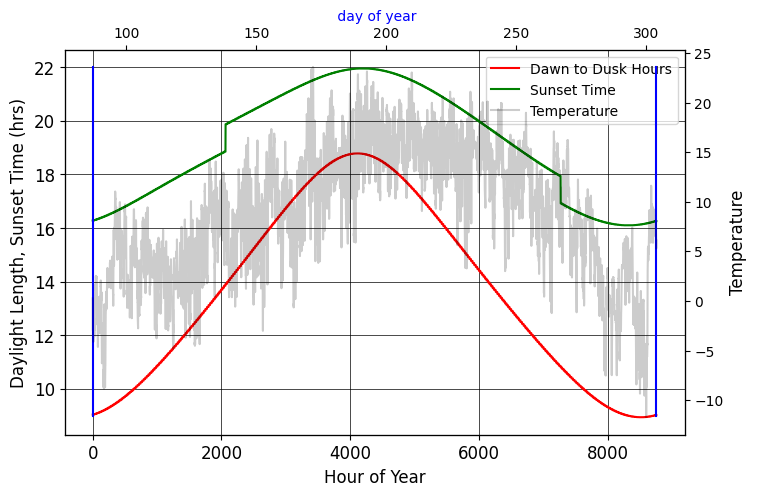

In [ ]:
# plot daylight , sunset etc

fig = plt.figure(figsize=(8,5));
ax1 = fig.add_subplot(111)
it1 = ax1.plot(np.arange(len(hours)), hourlyDayLight, color='r',label='Dawn to Dusk Hours') 
it2 = ax1.plot(np.arange(len(hours)), hourlySunset, color='g',label='Sunset Time')

ax1.set_xlabel('Hour of Year', fontsize=12)
ax1.set_ylabel('Daylight Length, Sunset Time (hrs)', fontsize=12)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(color='k', linestyle='-', linewidth=0.5)


ax2 = ax1.twiny()  # instantiate a second x axes that shares the same y-axis
ax2.set_xlabel(' day of year', color='b')  # we already handled the y-label with ax1
#ax2.plot(np.arange(len(dates)), sunset, color='g')
ax2.plot(2*[dst_dates[0].dayofyear],[9,22],color='b')
ax2.plot(2*[dst_dates[1].dayofyear],[9,22],color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax3 = ax1.twinx()
it3 = ax3.plot(np.arange(len(hours)), hourlyTemp, color='k',label='Temperature',alpha=0.2)
ax3.set_ylabel('Temperature', fontsize=12)


items = it1+it2+it3
labs = [i.get_label() for i in items]
ax1.legend(items, labs, loc=0);

      
# MLR Training & Prediction Features :   
Need (t-168) buffer for naive model       
featureLength = $\sum_{i=1}^{6}$(endPred[i]-(startTrain[i]+168)) 

# Inputs for MLR        
a) Training and Prediction windows       
b) Hour of Day, Day Of Week etc Classifiers          
c) styles and labels          
d) load and environmental data series           

*Train on 6 week periods and test on following 2 weeks    
 ie periods will start on same day of week*  

 *must run following group of cells to set key parameters*

In [ ]:
# set training and prediction window(s) :  maintain equal lengths for each period..

# preferred configuration: training on 6 periods across full year

nPeriods=6  
nWeeks=8   
trainWeeks=6  
predWeeks=2  

trainConfig = {'nPeriods':nPeriods,'nWeeks':nWeeks,'trainWeeks':trainWeeks,'predWeeks':predWeeks}

In [ ]:
# set Classifiers: HourOfDay, DayOfWeek, Seasonality (PeriodOfYear)

#create HoD (Hour Of Day) classifier - see IRL3 script for analysis
nightTime = np.asarray([23,0,1,2,3,4,5,6])   # ie 2300 to 0700
earlyMorn = np.asarray([7,8,9])              # 0700 to 1000
dayTime = np.asarray([10,11,12,13,14,15])    # 1000 to 1600
eveningTime = np.asarray([16,17,18,19,20,21,22,23])   #1600 to 0000   OVERLAPS WITH nightTime
timeLists = [nightTime, earlyMorn, dayTime, eveningTime]   # list of lists

#create DayOfWeek classifier
dayClassifier = [[1,2,3,4],[5,6,0]]

# create PeriodOfYear classifier: h1 and h2 classes for 1st/2md half of year ; see IRL3 script
h1=np.arange(0,sum(daynum[0:6]))
h2=np.arange(sum(daynum[0:6]),sum(daynum[0:12]))


PoYlist=[h1,h2]   # period of year list
#PoYlist


In [ ]:
# Set styles and label classes

lineStyles = ['-','-.',':','--']
lineStyles = ['solid', 'dashdot','dotted', 'dashed']

#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html


lineColors = ['k','b','g','r','m','c']  
lineWidths = [2,2,4,3,3,3]
myStyles = {'lineStyles':lineStyles,'lineColors':lineColors,'lineWiths':lineWidths}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', \
          'September', 'October','November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
calVars = {'months':months,'daynum':daynum,'dayLabels':dayLabels}

for key in calVars.keys():
    print(key,'->',calVars[key])

for val in calVars.values():
    print(val)

months -> ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
daynum -> [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels -> ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [ ]:
# PREPARE INPUTS 1:  - only need to do once for each trainConfig 

# Set windows and series lengths for each startTrain(i)+168 : end Pred(i))

featureLength,trainLength,predLength = 0,0,0
windows=np.zeros((nPeriods,4),dtype=np.int)  # to store train and predict windows

# loop through all periods, set training and prediction windows in each 
# NB : configured only for EQUAL length of each train+predict combined window 

for i in range(nPeriods):       # e.g. 6 periods of 8 weeks in year
    startTrain = np.int(i*(nWeeks*7)*24)        # start of each period
    endTrain = np.int( ((i*(nWeeks*7)+ (trainWeeks*7))*24))  # end of each training period
    startPred = endTrain
    endPred = np.int((i+1)*(nWeeks*7)*24)
    #print("startTrain:",startTrain,"endTrain:",endTrain,"startPred: ",startPred,"endPred: ",endPred)

    # train features start at startTrain+168 to capture aggLoad(t-168) data from TRAINING window only
    featureLength += (endPred-(startTrain+168))     # combined training+predict features
    trainLength += (endTrain-(startTrain+168))
    predLength += (endPred-startPred)     
 
    windows[i,0]= startTrain; windows[i,1]= endTrain
    windows[i,2]= startPred;  windows[i,3]= endPred
    
print("Totals: featureLength: ",featureLength,"trainLength: ",trainLength,"predLength: ",predLength)


Totals: featureLength:  7056 trainLength:  5040 predLength:  2016


In [ ]:
print(windows)   # indices =  hour of year  
print(len(windows)) # number of periods.

[[   0 1008 1008 1344]
 [1344 2352 2352 2688]
 [2688 3696 3696 4032]
 [4032 5040 5040 5376]
 [5376 6384 6384 6720]
 [6720 7728 7728 8064]]
6


Funtion set_loadSeries returns dictionary of modified load pd.Series

windows = list of start/stop hour of year indices defining each training / prediction window
load = input load series e.g. aggregate load

In [ ]:
# colate environmental series for train and test windows: for each startTrain(i)+168 : end Test(i))
# 'ALL' arg => collate train+test in one section for MLR inputs
envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

for k,v in envSeries.items():
    print("env series:{0},length:{1},type:{2},first val:{3}".format(k,len(v),type(v),v[0]))


env series:temp,length:7056,type:<class 'numpy.ndarray'>,first val:-7.55
env series:dayLight,length:7056,type:<class 'numpy.ndarray'>,first val:9.204722222222221
env series:sunset,length:7056,type:<class 'numpy.ndarray'>,first val:16.429444444444446


# Define load series to use 

Funtion *set_loadSeries* returns dictionary of modified load pd.Series 

 windows = list of start/stop hour of year indices defining each training / prediction window    
 load = input load series e.g. aggregate load     


In [ ]:
# define and print inputs to set_loadSeries function . MUST have 'yData','yDataTrain','yDataTest'. 
# For MLR, other series are needed JUST FOR PLOTTING and error computation? 
#          actual input time history series to regression are computed in populate_AllFeatures function

loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN168test']        # set load series names 
# count number of train (and test) series:
numSeries=0
for series in loadSeriesList:
    if ('train' in series) or ('Train' in series):
        numSeries+=1
print("numSeries:",numSeries)

loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)
loadSeriesLags = [0]+[0,24,25,26,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range


print("loadSeriesList: {0}".format(loadSeriesList))
print("loadSeriesOffsetsWinStart: {0}".format(loadSeriesOffsetsWinStart))    
print("loadSeriesLagsWinEnd: {0}".format(loadSeriesLags))
print("loadSeriesWindows: \nstart window indices:{0}, \nend window indices:{1}".format\
      (loadSeriesWindows[:,0],loadSeriesWindows[:,1]))


numSeries: 5
loadSeriesList: ['yData', 'yDataTrain', 'SN24train', 'SN25train', 'SN26train', 'SN168train', 'yDataTest', 'SN24test', 'SN25test', 'SN26test', 'SN168test']
loadSeriesOffsetsWinStart: [168, 168, 168, 168, 168, 168, 0, 0, 0, 0, 0]
loadSeriesLagsWinEnd: [0, 0, 24, 25, 26, 168, 0, 24, 25, 26, 168]
loadSeriesWindows: 
start window indices:[0 0 0 0 0 0 2 2 2 2 2], 
end window indices:[3 1 1 1 1 1 3 3 3 3 3]


In [ ]:
# colate load series for train and predict windows

loadSeries = set_loadSeries(windows,aggLoad,loadSeriesList,loadSeriesOffsetsWinStart,loadSeriesLags,\
                   loadSeriesWindows,'print_output')  # return dictionary of all load series 

for k,v in loadSeries.items():
    print("{0} of length {1},{2}".format(k,len(v),type(v)))

series: yData: append input load for windows(0,0)+168-0:windows(0,3)-0
series: yDataTrain: append input load for windows(0,0)+168-0:windows(0,1)-0
series: SN24train: append input load for windows(0,0)+168-24:windows(0,1)-24
series: SN25train: append input load for windows(0,0)+168-25:windows(0,1)-25
series: SN26train: append input load for windows(0,0)+168-26:windows(0,1)-26
series: SN168train: append input load for windows(0,0)+168-168:windows(0,1)-168
series: yDataTest: append input load for windows(0,2)+0-0:windows(0,3)-0
series: SN24test: append input load for windows(0,2)+0-24:windows(0,3)-24
series: SN25test: append input load for windows(0,2)+0-25:windows(0,3)-25
series: SN26test: append input load for windows(0,2)+0-26:windows(0,3)-26
series: SN168test: append input load for windows(0,2)+0-168:windows(0,3)-168
yData of length 7056,<class 'pandas.core.series.Series'>
yDataTrain of length 5040,<class 'pandas.core.series.Series'>
SN24train of length 5040,<class 'pandas.core.series

In [ ]:
hourlyTemp

0       0.26
1      -0.95
2      -2.07
3      -2.97
4      -2.23
        ... 
8755    6.23
8756    6.10
8757    6.20
8758    5.30
8759    5.99
Name: temperature, Length: 8760, dtype: float64

In [ ]:
# check for correct times etc
for series,vals in loadSeries.items():
    print(series)
    print(vals.head(2))

yData
2010-01-08 00:00:00    377.1495
2010-01-08 01:00:00    259.5030
dtype: float64
yDataTrain
2010-01-08 00:00:00    377.1495
2010-01-08 01:00:00    259.5030
dtype: float64
SN24train
2010-01-07 00:00:00    379.7755
2010-01-07 01:00:00    256.5365
dtype: float64
SN25train
2010-01-06 23:00:00    556.1845
2010-01-07 00:00:00    379.7755
dtype: float64
SN26train
2010-01-06 22:00:00    660.5565
2010-01-06 23:00:00    556.1845
dtype: float64
SN168train
2010-01-01 00:00:00    414.6385
2010-01-01 01:00:00    285.0400
dtype: float64
yDataTest
2010-02-12 00:00:00    317.3305
2010-02-12 01:00:00    213.3490
dtype: float64
SN24test
2010-02-11 00:00:00    291.4665
2010-02-11 01:00:00    206.4465
dtype: float64
SN25test
2010-02-10 23:00:00    438.9220
2010-02-11 00:00:00    291.4665
dtype: float64
SN26test
2010-02-10 22:00:00    548.385
2010-02-10 23:00:00    438.922
dtype: float64
SN168test
2010-02-05 00:00:00    280.0195
2010-02-05 01:00:00    188.1205
dtype: float64


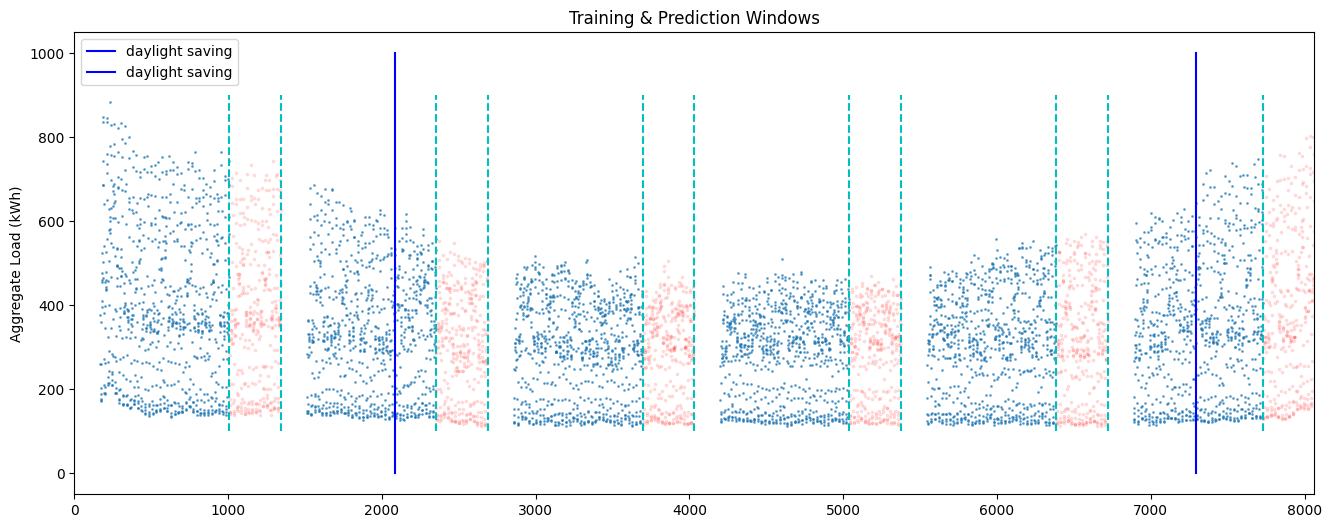

Hour of Year range: 168 8064


In [ ]:
# Plot TRAINING and PREDICTION windows with semi-transparent scatter plot of load data

# construct constant series to show ranges of training and prediction windows
df = pd.DataFrame(index=(loadSeries['yDataTrain'].index).union(loadSeries['yDataTest'].index)) 
df['hourOfYear']=((df.index.dayofyear-1)*24)+df.index.hour
df1 = df.loc[loadSeries['yDataTrain'].index, :] 
df1['flg']=1
df1['hourOfYear']=((df1.index.dayofyear-1)*24)+df1.index.hour

df2 = df.loc[loadSeries['yDataTest'].index, :] 
df2['flg']=2
df2['hourOfYear']=((df2.index.dayofyear-1)*24)+df2.index.hour
df = pd.concat([df1,df2])

# plot a) data b)  window ranges
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)

if len(windows)<=1:
    ax1.plot(df1['hourOfYear'],loadSeries['yDataTrain'].values,alpha=0.6)    
    ax1.plot(df2['hourOfYear'],loadSeries['yDataTest'].values,alpha=0.1,color='r') 
else:
    ax1.scatter(df1['hourOfYear'],loadSeries['yDataTrain'].values,s=1,alpha=0.6)
    ax1.scatter(df2['hourOfYear'],loadSeries['yDataTest'].values,alpha=0.1,s=3,color='r')


# add train and predict windows
yLim = get_limits(loadSeries['yData'], decimals=-2)     
for w,win in enumerate(windows):
    ax1.plot(2*[win[0]],[yLim[0],yLim[1]],color='c',linestyle='--')
    ax1.plot(2*[win[1]],[yLim[0],yLim[1]],color='c',linestyle='--')    
    
#add Daylight saving start/end dates
for d,date in enumerate(dst_dates):
    ax1.plot(2*[24*(date.dayofyear)],[0,1000],color='b',label='daylight saving')
    #ax1.plot(2*[24*(date.dayofyear)],[0,1000],color='y',label=legLabels[d])

ax1.set_ylabel('Aggregate Load (kWh)')  
ax1.set_title('Training & Prediction Windows')


ax1.set_xlim(0,df['hourOfYear'].max()+1)
ax1.legend()
plt.show()
del df1,df2

print("Hour of Year range:",df['hourOfYear'].min(),df['hourOfYear'].max()+1)
            

# MLR - set up training inputs
12 HoD/Temperature terms: (3 for each of 4 HoD bands) i.e. 1,T,T^2       
6 OPTIONAL PoY/Daylight terms: (3 for each of 2 PeriodOfYear bands) i.e. 1,D,D^2         
6 DayOfWeek terms: 2 x contant terms ; 2 x 24 lag terms (ie Tues-Fri and Sat-Mon); 2 x 168 lag terms         
(all  𝛽  terms initially 1 by default )



# SKIP DOWN TO "## Now run everything in one cell" 
(IF WISH TO RUN EVERYTHING IN ONE GO, rather than step by step as follows:)



# Now run everything in one cell 


series: yData: append input load for windows(0,0)+168-0:windows(0,3)-0
series: yDataTrain: append input load for windows(0,0)+168-0:windows(0,1)-0
series: SN24train: append input load for windows(0,0)+168-24:windows(0,1)-24
series: SN25train: append input load for windows(0,0)+168-25:windows(0,1)-25
series: SN26train: append input load for windows(0,0)+168-26:windows(0,1)-26
series: SN168train: append input load for windows(0,0)+168-168:windows(0,1)-168
series: yDataTest: append input load for windows(0,2)+0-0:windows(0,3)-0
series: SN24test: append input load for windows(0,2)+0-24:windows(0,3)-24
series: SN25test: append input load for windows(0,2)+0-25:windows(0,3)-25
series: SN26test: append input load for windows(0,2)+0-26:windows(0,3)-26
series: SN168test: append input load for windows(0,2)+0-168:windows(0,3)-168
7056
relative index : window to plot: [[0, 168], [168, 336]]
Index range to plot : plotStart 6384, plotEnd 6552; days 266.0 to 273.0; weeks 38.0 to 39.0
found startTick 6

TypeError: ignored

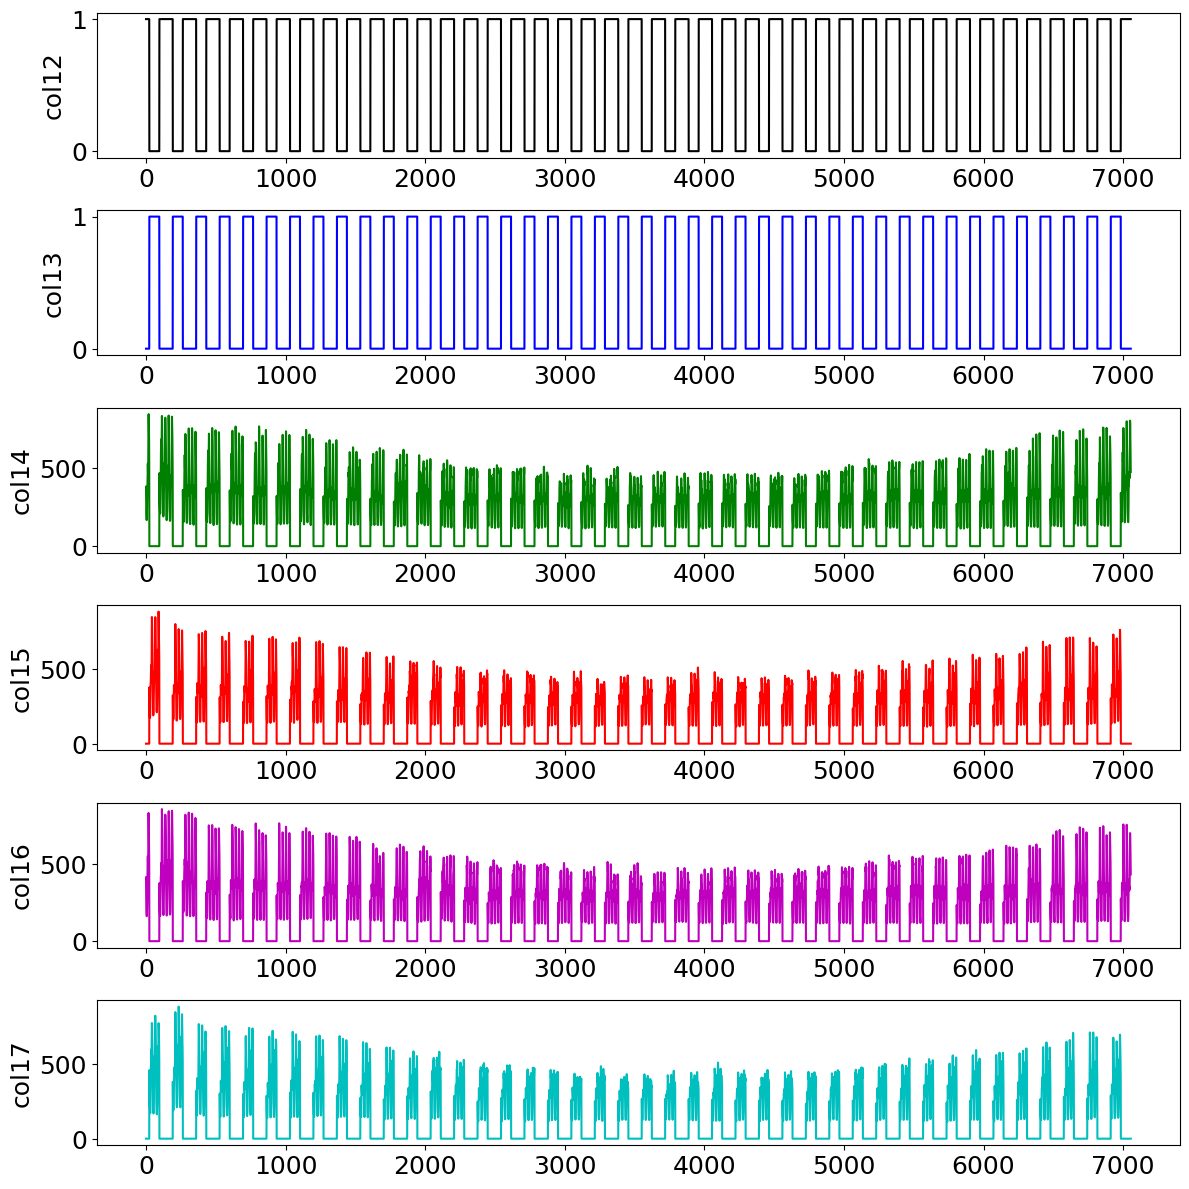

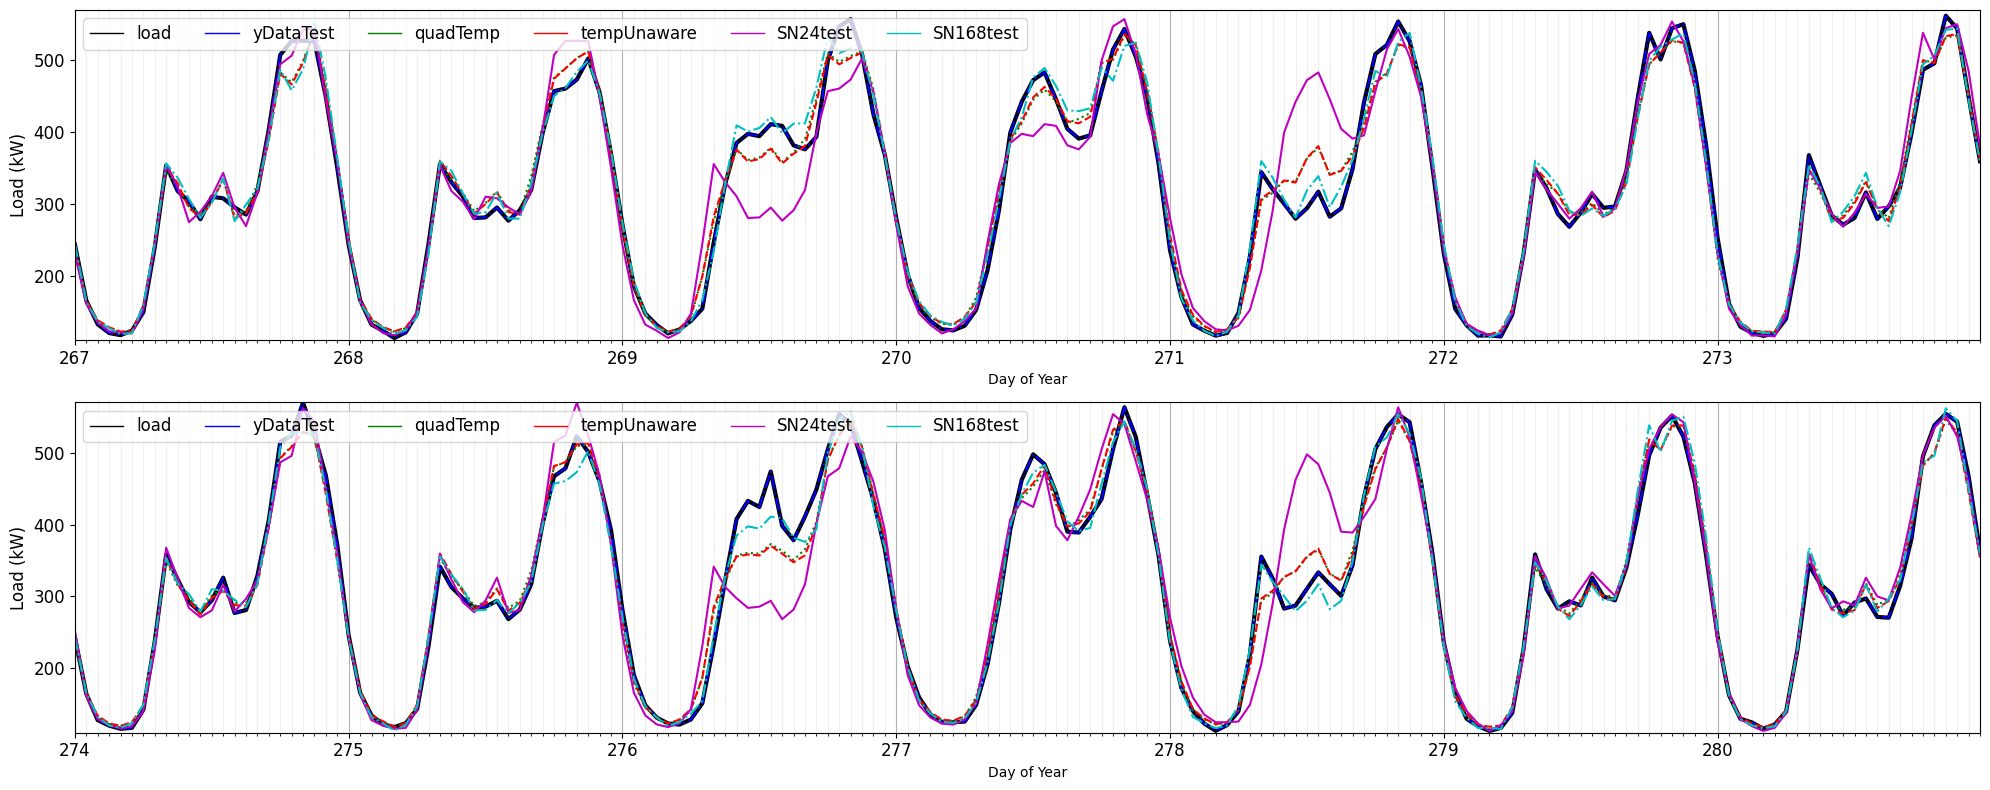

In [ ]:
# AGGREGATE CASE 

# collate adjusted load series for train and predict windows - ensure inputs are still  configured correctly 
loadSeries = set_loadSeries(windows,aggLoad,loadSeriesList,loadSeriesOffsetsWinStart,loadSeriesLags,\
                   loadSeriesWindows,'print_output')  # return dictionary of all load series 

# collate environmental data numpy arrays - same for all load combinations
envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)


#**************REMEMBER TO SET THESE CORRECTLY! *****************

#set whether temp (12 terms) or temp + another (eg daylight hrs)
nEnvTerms = 12   # 12,18 for TempUnawar & TempQuadratic, Temp+DayLight or Temp+Sunset quadratic respectively
nDoWterms = 6    # day of week terms ie 2 * 3 (l,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags= [24,168]         # lags=[24,25,26,168]

#populate allFeatures for aggregate case  
allFeatures = populate_AllFeatures(windows,featureLength,loadSeries['yData'],aggLoad,\
                     envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,LoD=envSeries[lodSeries],\
                              lags=lags,nDoWterms=nDoWterms)

# plot day class of allFeaturesTrain -  error checking
plot_allFeatures(nEnvTerms,nDoWterms,allFeatures)

#set train and predict features
allFeaturesTrain,allFeaturesPredict = create_TrainPredictSeries(trainLength,predLength,allFeatures,windows,nEnvTerms,nDoWterms)

# plot day class of allFeaturesTrain,allFeaturesPredict - error checking
#plot_allFeatures(nEnvTerms,1,allFeaturesTrain)
#plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

# run MLR training:
#for model with Quadratic environment variable dependency 
clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',allFeaturesTrain,loadSeries['yDataTrain'])      
# for 'Unaware;' model i.e. with NO environment variable dependency 
clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',allFeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'])      

# look at the predicted and actual load for the PREDICTION PERIOD
predictedQuadraticTemp = mlr_predict(clfQuadraticTemp,allFeaturesPredict,loadSeries['yDataTest'])
predictedTempUnaware = mlr_predict(clfTempUnaware,allFeaturesPredict[:,nEnvTerms:nEnvTerms+nDoWterms],loadSeries['yDataTest'])


# Plot forecast as a) standard profile :
# create dictionary of model names to plot
models = {'yDataTest':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
start=windows[4,2]
plot_forecast(2,windows,start,aggLoad,models,calVars,myStyles)

# Plot forecast as (b) stacked 1 day profiles:
# create dictionary of 'model' names to plot
models = {'load':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test']} #'SN168': loadSeries['SN168test']}
#stackplot_of_forecast(models,len(windows)*predWeeks)

#calculate errors and plot (prediction windows)
models = {'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
errors = get_errors(loadSeries['yDataTest'],models,minLim=0.005)
print("Mapes Forecast: \n",errors['MAPEs'])
plot_errors(errors,models,myStyles,figTitle='Aggregate forecast errors - prediction period')

#calculate errors and plot (training windows)
models = {'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware, \
          'SN24': loadSeries['SN24train'],'SN168': loadSeries['SN168train']}
errorsTrain = get_errors(loadSeries['yDataTrain'],models)
print("Mapes Training: \n",errorsTrain['MAPEs'])
plot_errors(errorsTrain,models,myStyles,figTitle='Aggregate forecast errors - training period')

with open('./project_data/intermediateDataIreland/aggErrorsForecast.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, errors.keys())
    w.writeheader()
    w.writerow(errors)
    
with open('./project_data/intermediateDataIreland/aggErrorsTrain.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, errorsTrain.keys())
    w.writeheader()
    w.writerow(errorsTrain)

# Now run MLR training on subsets of size N users        
loop through columns of df_grpAggLoad_N for each aggregation size N

MLR configurations to run - summary:      
1) [t-24,t-168] (6 DoW load terms)+[temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
- also returns UNAWARE version (just the DoW load terms)

2) [t-24,t-25,t-26,t-168] (10 DoW terms) + [temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
- also returns UNAWARE version (just the DoW load terms)

3) [t-24,t-168] (6 DoW load terms)+[temperature] + [dayLight] 
(12 TemperatureTerms:{4TimeOfDay*(const,linear,quadratic terms)} + 6 DayLightTerms: {2 PeriodOfYear*(const,linear,quadratic terms)}
- Unaware model is same as 1)

4)  add Daylight to 2)

5),6) perhaps add sunset if exclude DST dates...
   


# define 'do it all' MLR function 
keep here for simplicity - ugly parameter list but tidy into dictionaries some other time

In [ ]:
def runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles):
    
    errorsAgg = {}  # create empty dictionary to hold set of dataframes with error stats for each aggregation level

    for N in aggregation_N:

        # Run 'out of sample' selection of random user subsets of size N
        df_randIDgrps_N = randomUserGroups(hourly_df,N)

        # loop through randID groups and get aggregate load series for each
        df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)

        #initialize dataFrame to hold error stats
        df_errorsAgg_N_MAPEs = pd.DataFrame()
        df_errorsAgg_N_MCVs = pd.DataFrame()
        df_errorsAgg_N_MNRMSEs = pd.DataFrame()

        columns=[]  # df column names

        #Loop through each aggregate group of size N 
        start_time = time.time()
        for i,col in  enumerate(df_grpAggLoad_N.columns):
            load = df_grpAggLoad_N[col]
            #print("Aggregate {0}, series length {1}".format(col,load.shape[0]))

            # collate load and environmental series for train and predict windows
            loadSeries = set_loadSeries(windows,load,\
                                        loadFormParams['loadSeriesList'],loadFormParams['loadSeriesOffsetsWinStart'],\
                                        loadFormParams['loadSeriesLags'],loadFormParams['loadSeriesWindows']\
                                       )  # return dictionary of all load series 

            #populate allFeatures 
            Features = populate_AllFeatures(windows,featureLength,loadSeries['yData'],load,\
                                 envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,\
                                LoD=envSeries[lodSeries],lags=lags,nDoWterms=nDoWterms)      

            # plot day class of allFeaturesTrain - error checking; plot first group
            if (i==0):
                plot_allFeatures(nEnvTerms+2,1,Features,windowLength=2*168)   # plot 1 of t-24 terms   

            #set train and predict features
            FeaturesTrain,FeaturesPredict = create_TrainPredictSeries(trainLength,predLength,Features,windows,nEnvTerms,nDoWterms)

            #if (i==0):
            #    plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

            # run MLR training:
            #for model with Quadratic environment variable dependency , print regression params on first iteration
            if (i==0):
                print("regression coeffs - QUADRATIC model :")
                clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',FeaturesTrain,loadSeries['yDataTrain'],'print_output')      
            else:
                clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',FeaturesTrain,loadSeries['yDataTrain'])

            # for 'Unaware;' model i.e. with NO environment variable dependency , print regression params on first iteration
            if (i==0):
                print("regression coeffs - UNAWARE model:")
                clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',FeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'],'print_output')                                                               
            else:
                clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',FeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'])      


            # look at the predicted and actual load for the PREDICTION PERIOD
            predictedQuadraticTemp = mlr_predict(clfQuadraticTemp,FeaturesPredict,loadSeries['yDataTest'])
            predictedTempUnaware = mlr_predict(clfTempUnaware,FeaturesPredict[:,nEnvTerms:nEnvTerms+nDoWterms],loadSeries['yDataTest'])


            # plot forecast for n (e.g. 2) 1 week sections: just for every 10th or 20th group etc
            if (i%30==0):     
                models = {'yDataTest':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
                          'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
                start=windows[4,2]
                plot_forecast(1,windows,start,load,models,calVars,myStyles,figTitle=\
                              'forecast for aggregation level '+str(N))         

            #calculate errors and plot (PREDICTION windows)
            models = {'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
                      'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
            errors = get_errors(loadSeries['yDataTest'],models,minLim=0.005)

            #if want to plot errors .. too many 
            #if (i%20==0):      
            #    plot_errors(errors,models,myStyles,figTitle=col+'forecast errors - prediction period')

            # add col to errors df for MAPEs
            columns.append(col)
            df_errorsAgg_N_MAPEs = pd.concat([df_errorsAgg_N_MAPEs,pd.DataFrame(errors['MAPEs'])],axis=1)
            df_errorsAgg_N_MCVs = pd.concat([df_errorsAgg_N_MCVs,pd.DataFrame(errors['MCVs'])],axis=1)
            df_errorsAgg_N_MNRMSEs = pd.concat([df_errorsAgg_N_MNRMSEs,pd.DataFrame(errors['MNRMSEs'])],axis=1)

            #calculate errors and plot (training windows)                               
            models = {'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware,  \
                     'SN24': loadSeries['SN24train'],'SN168': loadSeries['SN168train']}
            errorsTrain = get_errors(loadSeries['yDataTrain'],models,minLim=0.005)
            #if (i%20==0):       
            #    plot_errors(errorsTrain,models,myStyles,figTitle=col+'forecast errors - prediction period') 
            print("For N {0},{1},MapesFC:{2},MapesTrain:{3}".format(N,col,errors['MAPEs'],\
                                                                    errorsTrain['MAPEs']))

        print("For agg level {0},-- {1} seconds to run, current time{2}".\
                  format(N,(time.time()-start_time),datetime.now().strftime("%H:%M:%S")) )

        for df in [df_errorsAgg_N_MAPEs,df_errorsAgg_N_MCVs,df_errorsAgg_N_MNRMSEs]:
            df.columns = columns
            df.index = ['quadratic','unAware','SN24test','SN168test']

        d={}
        d['MAPEs'] = df_errorsAgg_N_MAPEs
        d['MCVs'] =  df_errorsAgg_N_MCVs
        d['MRMSEs'] = df_errorsAgg_N_MNRMSEs
        errorsAgg['%d' % (N)] = d                      # update dictionary of PREDICTION errors

    return(errorsAgg)


In [ ]:
# define function to save all ANN result to disk - keep here for now ratrher than in module

def saveMLRconfigXresults(paramsDict,root,globPrefix,config,aggregation_N,resultsDictionaries):

    dirName = get_save_folderName(paramsDict,'MLR',root=root,globPrefix=globPrefix,\
                              config=config,aggregation_N=aggregation_N)

    create_save_folder(dirName)

    #save dictionaries to pickle file: TEST errors, TRAIN errors,Forecast series,N level aggregate load series
    pklsToSave=[]
    for dictName in resultsDictionaries.keys():
        pickleFileName = '/' + str(dictName) +'.pickle'
        pklsToSave.append(pickleFileName)

    for pklfile,dictName,dict in zip(pklsToSave,resultsDictionaries.keys(),resultsDictionaries.values()):
        with open(dirName+pklfile, 'wb') as f:
            pickle.dump(dict, f, protocol=pickle.HIGHEST_PROTOCOL)
        print("dictionary {0} saved to pickle file {1}".format(dictName,pklfile))

    #save parameters used to json file 
    with open(dirName+'/mlrParamsDict.json', 'w') as f:
        json.dump(paramsDict, f)
        f.close()    


In [ ]:
# Config #1 for MLR:

# [t-24,t-168] (6 DoW load terms)+[temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
#     also returns UNAWARE version (just the DoW load terms)

# First parts unlikely to need editing

# load series list to use - must have 'yData','yDataTrain','yDataTest' but other series just for plots
# and errors as regression inputs re-computed from 'yData' series in populate_AllFeatures function
loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN168test']        # set load series names 

# set appropriate offsets,lags, etc for load series forming
numSeries=0
for series in loadSeriesList:
    if ('train' in series) or ('Train' in series):
        numSeries+=1
print("numSeries:",numSeries)
loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)

# *** UPDATE loadSeriesLags FOR EACH NEW CONFIGURATION but ONLY if loadSeriesList changes **
#  number of elements should match loadSeriesList etc (this is before we drop any)
loadSeriesLags = [0]+[0,24,25,26,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range
loadFormParams = {'loadSeriesList':loadSeriesList,'loadSeriesOffsetsWinStart':loadSeriesOffsetsWinStart,\
                  'loadSeriesLags':loadSeriesLags,'loadSeriesWindows':loadSeriesWindows}
 
# create PeriodOfYear classifier: h1 and h2 classes for 1st/2md half of year 
h1=np.arange(0,sum(daynum[0:6])); h2=np.arange(sum(daynum[0:6]),sum(daynum[0:12]))
PoYlist=[h1,h2]   

# set environmental series
envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

    
#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [100]  # for testing   
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab

nEnvTerms = 12   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 6    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,168]   #lags= [24,25,26,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

numSeries: 5


In [ ]:
# Run CONFIG1 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig1'
resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG1*** results
root='./project_data/intermediateDataIreland/'
globPrefix='IRL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Config #2 for MLR: just update variables changed since config1

# [t-24,t-25,t-26,t-168] (10 DoW terms) + [temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
# - also returns UNAWARE version (just the DoW load terms)

#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab


nEnvTerms = 12   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 10    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,25,26,168]   #lags= [24,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

In [ ]:
# Run CONFIG2 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig2'

resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG2*** results
root='./project_data/intermediateDataIreland/'
globPrefix='IRL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Config #3 for MLR: just update variables changed since config2

# [t-24,t-168] (6 DoW load terms)+[temperature] + [dayLight] 
#(12 TemperatureTerms:{4TimeOfDay*(const,linear,quadratic terms)} + 6 DayLightTerms: {2 PeriodOfYear*(const,linear,quadratic terms)}
# Unaware model is same as 1)

#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab


nEnvTerms = 18   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 6    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,168]   #lags= [24,25,26,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

In [ ]:
# Run CONFIG3 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig3'
resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG3*** results
root='./project_data/intermediateDataIreland/'
globPrefix='IRL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Config #4 for MLR: just update variables changed since config3

# [t-24,t-25,t-26,t-168] (10 DoW load terms)+[temperature] + [dayLight] 
#(12 TemperatureTerms:{4TimeOfDay*(const,linear,quadratic terms)} + 6 DayLightTerms: {2 PeriodOfYear*(const,linear,quadratic terms)}
# Unaware model is same as 2)

#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab


nEnvTerms = 18   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 10    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,25,26,168]   #lags= [24,25,26,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

In [ ]:
# Run CONFIG4 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig4'
resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG4*** results
root='./project_data/intermediateDataIreland/'
globPrefix='IRL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!zip -r /content/IRL_MLR_ColabResults.zip /content/project_data/intermediateDataIreland/
!ls
from google.colab import files
files.download("/content/IRL_MLR_ColabResults.zip") 

  adding: content/project_data/intermediateDataIreland/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/aggErrorsForecast.csv (deflated 38%)
  adding: content/project_data/intermediateDataIreland/Dublin_Temperature.csv (deflated 85%)
  adding: content/project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv (deflated 89%)
  adding: content/project_data/intermediateDataIreland/CER_Data_Step6.hourly_df.pkl (deflated 69%)
  adding: content/project_data/intermediateDataIreland/IRL_MLR_MLRconfig1run2_ALLincl1_12envTerms_6DoWterms/ (stored 0%)
  adding: content/project_data/intermediateDataIreland/IRL_MLR_MLRconfig1run2_ALLincl1_12envTerms_6DoWterms/mlrParamsDict.json (deflated 17%)
  adding: content/project_data/intermediateDataIreland/IRL_MLR_MLRconfig1run2_ALLincl1_12envTerms_6DoWterms/errorsAgg_dict.pickle (deflated 30%)
  adding: content/project_data/intermediateDataIreland/IRL_MLR_MLRconfig4run5_ALLincl1_18envTerms_10DoWterms/ (stored 0%)
  adding: content/pro

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# R2 persistance model 

In [ ]:
# Test persistDataArrayVersion2 function - check dimensions same as v1 

lDataTtoF = persistDataArrayVersion2(aggLoad,smplsPerDay=24,nDays=365,dayClass=[1,2,3,4],lagD=1,refDay=0)
print(lDataTtoF.shape)
lDataStoM = persistDataArrayVersion2(aggLoad,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=1,refDay=0)
print(lDataStoM.shape)
lDataStoM_7d = persistDataArrayVersion2(aggLoad,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=7,refDay=7)
print(lDataStoM_7d.shape)

(2, 4968)
(2, 3744)
(2, 3672)


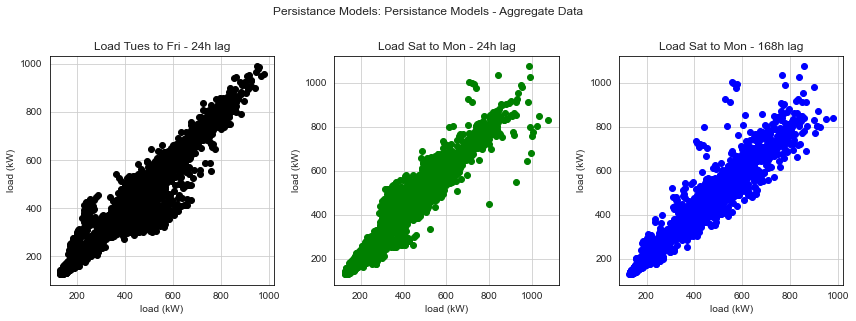

In [ ]:
# plot output of persistDataArrayVersion2 function to verify working as expect ie do the plots look identical to those in IRL4 script.
peristModelPlot(lDataTtoF,lDataStoM,lDataStoM_7d,supTitle='Persistance Models - Aggregate Data')

*inputs for regression and r2 calculation :
1) feature np array e.g. t-24 hourly or daily load series
2) target np array e.g. t hourly or daily load series
Run on a) Aggregate b) Individual users
*

Coefficients:  [[0.94687975]]
Mean squared error:  1987.9678902436924
Coefficient of determination:  0.9311581098232914
r2:  0.9311581098232914 mean sq error:  1987.9678902436924


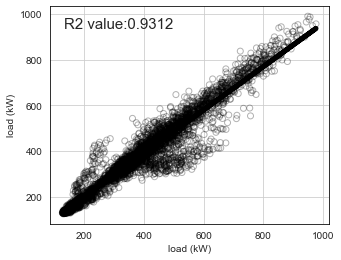

In [ ]:
# this is just a test of method
# Get r2 for aggregate HOURLY load split by weekday, weekends etc and PLOT DATA

# assign independent var (features),xs and dependent var (target) ys
xs=lDataTtoF[0]
ys=lDataTtoF[1]
r2,mse = lrmodel_r2(xs,ys,plot='y',print='y',cl='k',inputFigObject='None')
print("r2: ",r2,"mean sq error: ",mse)


Aggregate Load T_to_F 24h persistance model R2:  0.9311581098232914
Aggregate Load S_to_M 24h persistance model R2:  0.9235892555710215
Aggregate Load S_to_M 168h persistance model R2:  0.9342352459393636


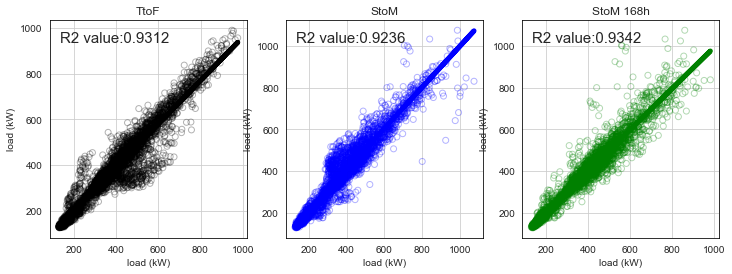

In [ ]:
# test for aggregate case for each DoW class
fig = plt.figure(figsize=(12,4))  # create empty fig object on which to append subplots

print("Aggregate Load T_to_F 24h persistance model R2: ",r2_get(lDataTtoF,plot='y',cl='k',inputFigObject=fig,subplotPos=1,subplotTitle='TtoF'))
print("Aggregate Load S_to_M 24h persistance model R2: ",r2_get(lDataStoM,plot='y',cl='b',inputFigObject=fig,subplotPos=2,subplotTitle='StoM'))
print("Aggregate Load S_to_M 168h persistance model R2: ",r2_get(lDataStoM_7d,plot='y',cl='g',inputFigObject=fig,subplotPos=3,subplotTitle='StoM 168h'))


In [ ]:
# first, get uID list
uIDs=hourly_df.index.values
len(uIDs)
print(type(uIDs[0]))
uIDs

<class 'numpy.int64'>


array([1002, 1014, 1018, 1022, 1027, 1030, 1035, 1036, 1058, 1059, ...,
       7400, 7403, 7414, 7418, 7420, 7428, 7432, 7436, 7437, 7441],
      dtype=int64)

In [ ]:
hourly_df

,2010-01-01 00:00:00,2010-01-01 01:00:00,2010-01-01 02:00:00,2010-01-01 03:00:00,2010-01-01 04:00:00,2010-01-01 05:00:00,2010-01-01 06:00:00,2010-01-01 07:00:00,2010-01-01 08:00:00,2010-01-01 09:00:00,2010-01-01 10:00:00,2010-01-01 11:00:00,2010-01-01 12:00:00,2010-01-01 13:00:00,2010-01-01 14:00:00,2010-01-01 15:00:00,2010-01-01 16:00:00,2010-01-01 17:00:00,2010-01-01 18:00:00,2010-01-01 19:00:00,2010-01-01 20:00:00,2010-01-01 21:00:00,2010-01-01 22:00:00,2010-01-01 23:00:00,2010-01-02 00:00:00,2010-01-02 01:00:00,2010-01-02 02:00:00,2010-01-02 03:00:00,2010-01-02 04:00:00,2010-01-02 05:00:00,2010-01-02 06:00:00,2010-01-02 07:00:00,2010-01-02 08:00:00,2010-01-02 09:00:00,2010-01-02 10:00:00,2010-01-02 11:00:00,2010-01-02 12:00:00,2010-01-02 13:00:00,2010-01-02 14:00:00,2010-01-02 15:00:00,2010-01-02 16:00:00,2010-01-02 17:00:00,2010-01-02 18:00:00,2010-01-02 19:00:00,2010-01-02 20:00:00,2010-01-02 21:00:00,2010-01-02 22:00:00,2010-01-02 23:00:00,2010-01-03 00:00:00,2010-01-03 01:00:00,...,2010-12-29 22:00:00,2010-12-29 23:00:00,2010-12-30 00:00:00,2010-12-30 01:00:00,2010-12-30 02:00:00,2010-12-30 03:00:00,2010-12-30 04:00:00,2010-12-30 05:00:00,2010-12-30 06:00:00,2010-12-30 07:00:00,2010-12-30 08:00:00,2010-12-30 09:00:00,2010-12-30 10:00:00,2010-12-30 11:00:00,2010-12-30 12:00:00,2010-12-30 13:00:00,2010-12-30 14:00:00,2010-12-30 15:00:00,2010-12-30 16:00:00,2010-12-30 17:00:00,2010-12-30 18:00:00,2010-12-30 19:00:00,2010-12-30 20:00:00,2010-12-30 21:00:00,2010-12-30 22:00:00,2010-12-30 23:00:00,2010-12-31 00:00:00,2010-12-31 01:00:00,2010-12-31 02:00:00,2010-12-31 03:00:00,2010-12-31 04:00:00,2010-12-31 05:00:00,2010-12-31 06:00:00,2010-12-31 07:00:00,2010-12-31 08:00:00,2010-12-31 09:00:00,2010-12-31 10:00:00,2010-12-31 11:00:00,2010-12-31 12:00:00,2010-12-31 13:00:00,2010-12-31 14:00:00,2010-12-31 15:00:00,2010-12-31 16:00:00,2010-12-31 17:00:00,2010-12-31 18:00:00,2010-12-31 19:00:00,2010-12-31 20:00:00,2010-12-31 21:00:00,2010-12-31 22:00:00,2010-12-31 23:00:00
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1002,0.2340,0.0865,0.0555,0.1055,0.0915,0.0480,0.1230,0.1060,0.2745,0.4495,0.9495,0.3070,0.4260,0.2205,0.2310,0.3715,0.3215,0.4570,0.2980,0.1630,0.1360,0.1970,0.1590,0.1485,0.2045,0.1270,0.2015,0.1535,0.1695,0.1875,0.1480,0.1990,0.1440,0.2010,0.1210,0.2025,0.3000,0.2100,0.0405,0.1210,0.0410,0.1300,0.0320,0.5560,0.5235,0.6585,0.5845,0.6160,0.4895,0.0465,...,0.3365,0.3580,0.3915,0.0835,0.0630,0.0605,0.0605,0.0570,0.0510,0.0520,0.0480,0.0650,0.456,0.5615,0.4760,0.1090,0.0570,0.0575,0.0565,0.0560,0.0465,0.0470,0.2145,0.3520,0.3510,0.3445,0.1625,0.0595,0.0595,0.0595,0.0595,0.0915,0.0870,0.0615,0.0600,0.0580,0.3620,0.5845,1.6140,0.9905,0.2830,0.1940,0.2020,0.2060,0.3435,0.4025,0.2895,0.2915,0.2625,0.2660
1014,1.5060,0.7825,0.6985,0.7385,0.6385,0.7615,0.6845,0.7650,2.5470,1.0510,0.8420,0.1475,0.1360,0.2625,0.8400,0.5595,0.8085,0.7635,1.6020,1.2985,1.9905,1.6510,1.2940,0.8540,1.1600,0.5845,0.5245,0.5640,0.5730,0.5210,0.4890,0.5950,0.5715,0.4845,0.6515,1.3675,3.2165,2.5825,0.8675,0.7365,0.2965,0.8785,2.4415,1.6690,1.5085,1.5175,1.0965,1.1090,0.6230,0.6980,...,0.5135,1.9620,0.7840,0.3250,0.3165,0.3090,0.3120,0.2435,0.1535,0.1820,0.3015,0.2590,0.152,0.5275,0.9250,0.7660,1.3850,0.8445,0.7055,0.9295,1.6630,1.2875,1.1210,1.2505,1.1270,1.0105,0.8415,0.3205,0.3200,0.3230,0.4040,0.3360,0.1700,0.1850,0.3110,0.5615,1.0895,0.1830,0.1415,0.2755,0.3040,0.3065,0.2870,0.4140,0.5700,1.1270,1.0970,1.2275,1.1480,1.5110
1018,0.4710,0.4655,0.4515,0.4640,0.4750,0.4730,0.4830,0.7165,0.7205,0.8405,2.0985,1.5795,0.8235,1.6530,0.9420,2.6380,1.3610,1.3310,1.5805,1.5385,1.4420,1.3475,1.5760,1.3225,1.1555,0.7570,0.5570,0.4920,0.4765,0.4515,0.5110,0.7390,0.6935,0.5945,1.3640,1.4895,2.1965,1.9100,1.8890,1.2465,1.8560,2.2260,1.6145,1.6665,1.4530,1.3415,1.0935,0.9720,0.5205,0.4635,...,1.9395,0.9305,0.7995,0.5090,0.4635,0.4620,0.5015,0.4410,0.4900,0.4615,0.4520,1.0240,0.728,0.6175,1.5010,1.1725,

In [ ]:
# Loop thro uIDs and calc r2 for each uID :
# compute 3 r2 values for each uID: TtoF,StoM (t-24) model and StoM (t-168) model

r2List_TtoF=[]
r2List_StoM=[]
r2List_StoM_7d=[]

for uID in uIDs:
    uID_load  = hourly_df.loc[uID]      
    #print(type(uID_load))
    #print(uID_load.shape)
    #print(uID)

    lDataTtoF = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[1,2,3,4],lagD=1,refDay=0)
    #print(lDataTtoF.shape)
    lDataStoM = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=1,refDay=0)
    #print(lDataStoM.shape)
    lDataStoM_7d = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=7,refDay=7)
    #print(lDataStoM_7d.shape)
    
    r2 = r2_get(lDataTtoF,plot='n',print='n',cl='k') 
    #print("r2 (TtoF data): ",r2,"mean sq error (TtoF data): ",mse)
    r2List_TtoF.append([r2])

    r2 = r2_get(lDataStoM,plot='n',print='n',cl='b')  
    #print("r2 (StoM data): ",r2,"mean sq error (StoM data): ",mse)
    r2List_StoM.append([r2])
    
    r2 = r2_get(lDataStoM_7d,plot='n',print='n',cl='b')  
    #print("r2 (StoM 7 day persistance data): ",r2,"mean sq error (StoM 7 day persistance data): ",mse)
    r2List_StoM_7d.append([r2])

#r2TtoF_df = pd.DataFrame(r2List_TtoF,columns=['meterID','r2'])
#r2StoM_df = pd.DataFrame(r2List_StoM,columns=['meterID','r2'])
#r2StoM7d_df = pd.DataFrame(r2List_StoM_7d,columns=['meterID','r2'])

# instead write all 3 r2 lists to a single dataFrame
r2uIDs_df=pd.DataFrame(np.column_stack([uIDs,r2List_TtoF,r2List_StoM,r2List_StoM_7d]),\
                       columns=['uID','r2_TtoF','r2_StoM','r2_StoM_7d'])
r2uIDs_df

,uID,r2_TtoF,r2_StoM,r2_StoM_7d
0,1002.0,0.080020,0.054899,0.031862
1,1014.0,0.176981,0.134754,0.112719
2,1018.0,0.168022,0.181910,0.041359
3,1022.0,0.209167,0.155637,0.102686
4,1027.0,0.093970,0.063392,0.187813
...,...,...,...,...
749,7428.0,0.163370,0.088835,0.051100
750,7432.0,0.056268,0.020951,0.050060
751,7436.0,0.181397,0.191833,0.168254
752,7437.0,0.185520,0.106172,0.230949


In [ ]:
r2uIDs_df['uID'] = r2uIDs_df['uID'].astype(int)
r2uIDs_df

,uID,r2_TtoF,r2_StoM,r2_StoM_7d
0,1002,0.080020,0.054899,0.031862
1,1014,0.176981,0.134754,0.112719
2,1018,0.168022,0.181910,0.041359
3,1022,0.209167,0.155637,0.102686
4,1027,0.093970,0.063392,0.187813
...,...,...,...,...
749,7428,0.163370,0.088835,0.051100
750,7432,0.056268,0.020951,0.050060
751,7436,0.181397,0.191833,0.168254
752,7437,0.185520,0.106172,0.230949


In [ ]:
# check output 
r2Vals = r2uIDs_df['r2_TtoF'].values
print(len(r2Vals),type(r2Vals))
print(r2Vals)

r2uIDs_df = r2uIDs_df.set_index('uID')
r2uIDs_df


754 <class 'numpy.ndarray'>
[0.0800202  0.17698105 0.16802168 0.20916721 0.09397018 0.04195994
 0.94523475 0.4583219  0.17981442 0.30165801 ... 0.15794446 0.13838924
 0.07743864 0.05363574 0.18774181 0.1633702  0.0562681  0.18139684
 0.18552012 0.58521511]


,r2_TtoF,r2_StoM,r2_StoM_7d
uID,,,
1002,0.080020,0.054899,0.031862
1014,0.176981,0.134754,0.112719
1018,0.168022,0.181910,0.041359
1022,0.209167,0.155637,0.102686
1027,0.093970,0.063392,0.187813
...,...,...,...
7428,0.163370,0.088835,0.051100
7432,0.056268,0.020951,0.050060
7436,0.181397,0.191833,0.168254


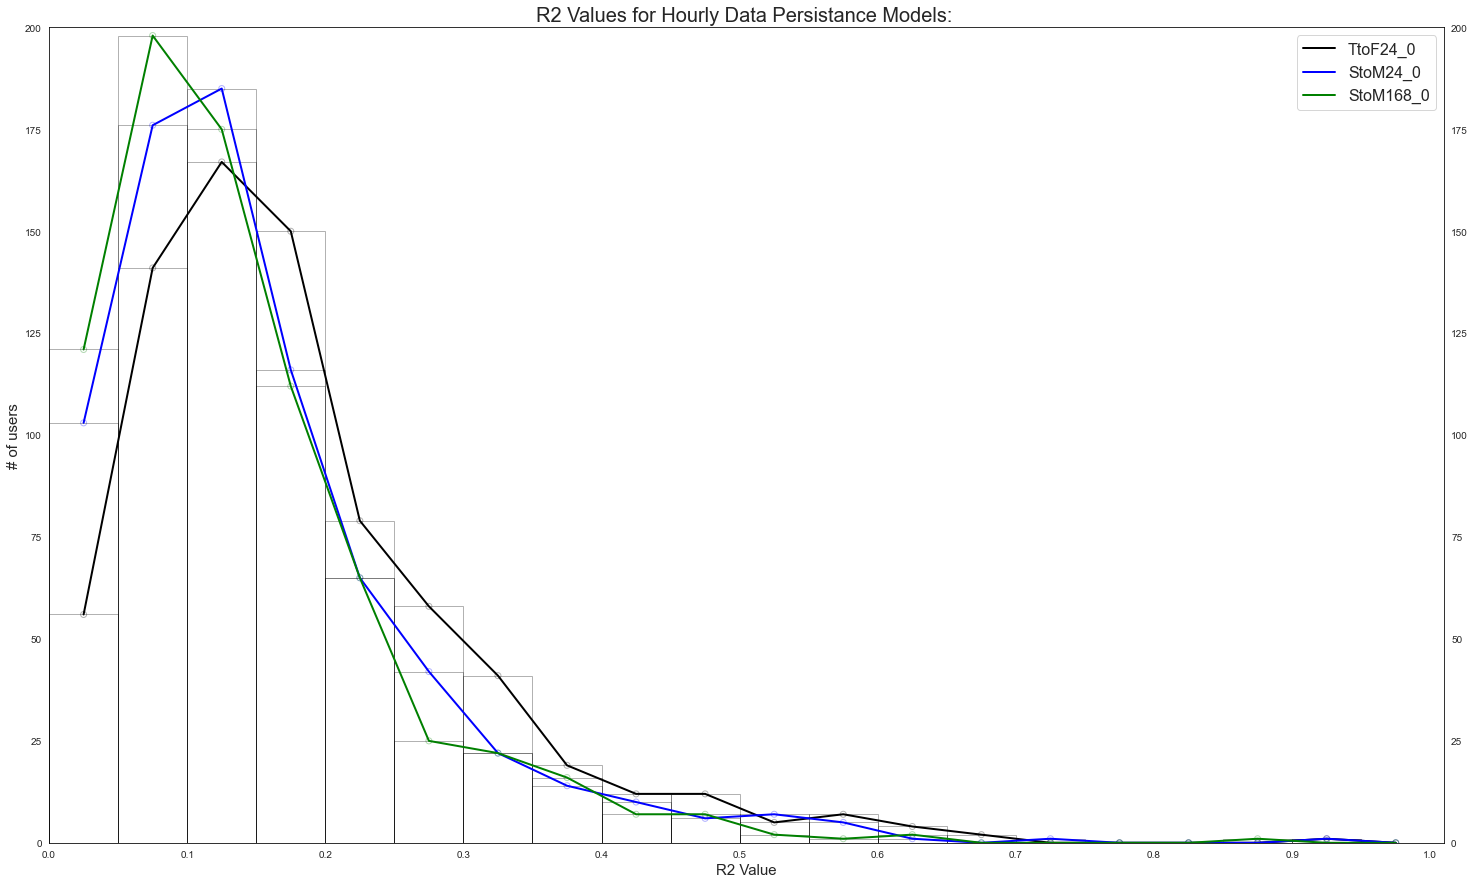

In [ ]:
r2_histogram(r2uIDs_df,pltTitle='')

** Now use different window widths to extract optimal persistance model xs,ys pairs: **

Process for estimating predictability of user based on perisistance model window size
Loop through window widths from 0 (+/-0 1hr) to 24 (+/-12) hrs where for each:

Construct input data array containing xs,ys series (for TtoF,StoM, StoM-7d models); function: persistDataWindowed
Compute r2 values for uIDs or Aggregate for same models; function: get_r2

,0
0,0.931158
1,0.965429
2,0.976431
3,0.981483
4,0.984774
5,0.988727
6,0.991453
7,0.994404


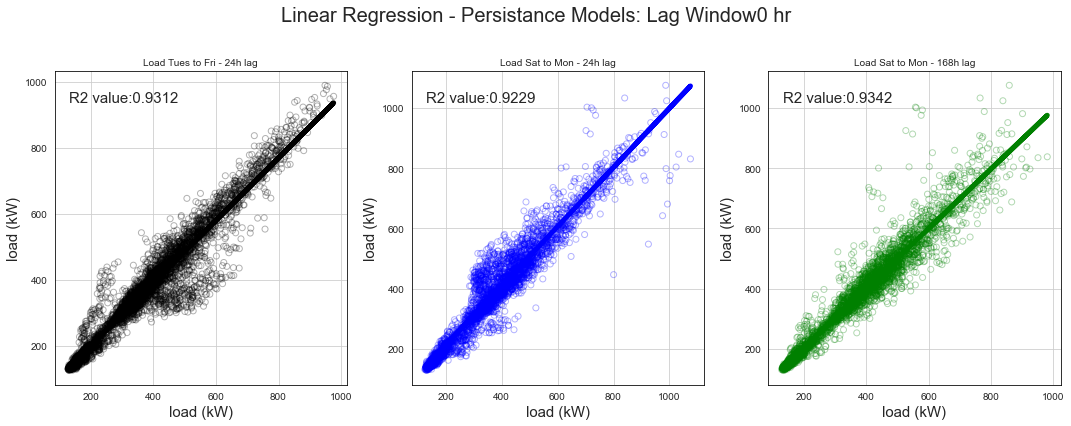

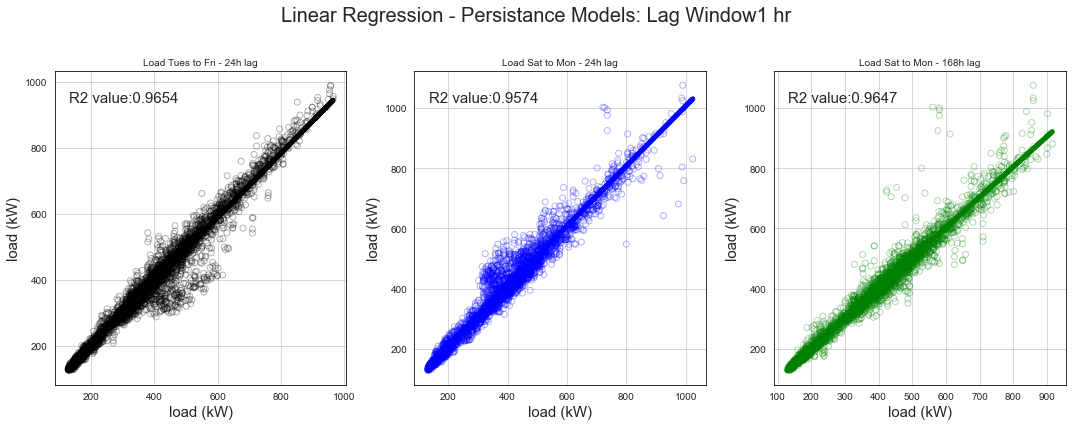

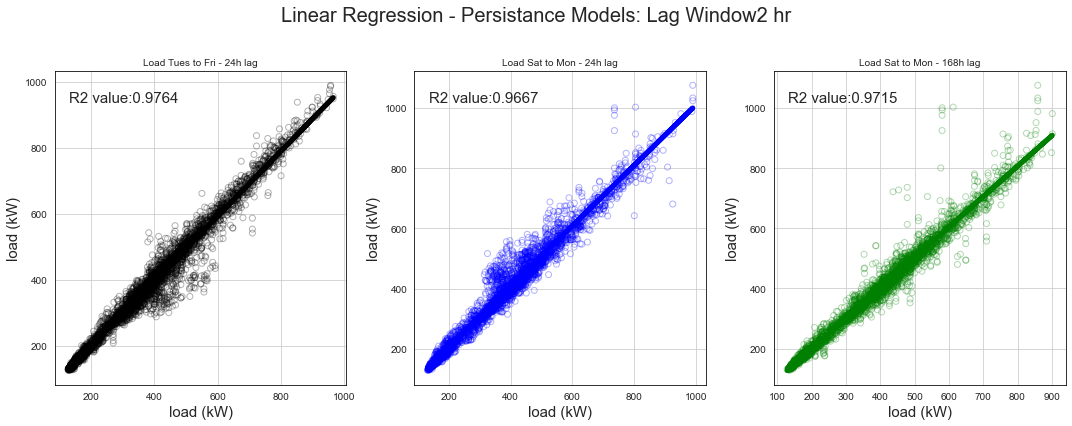

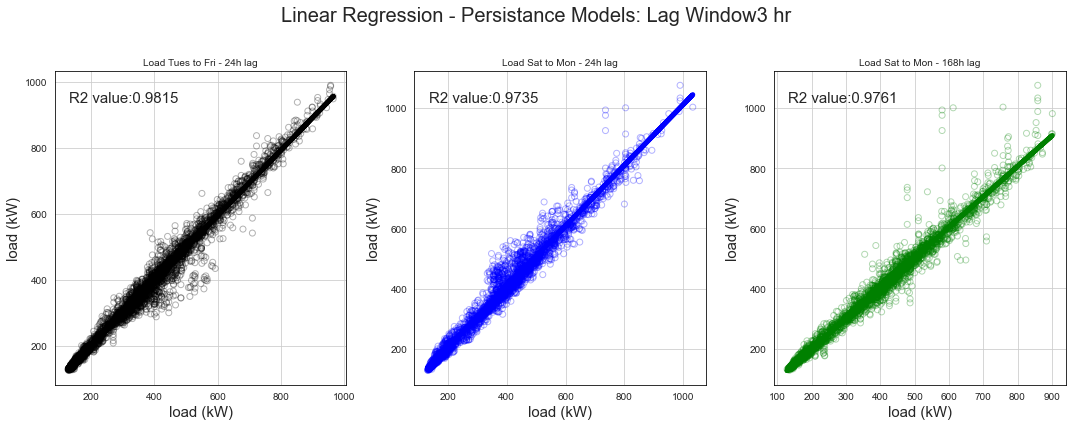

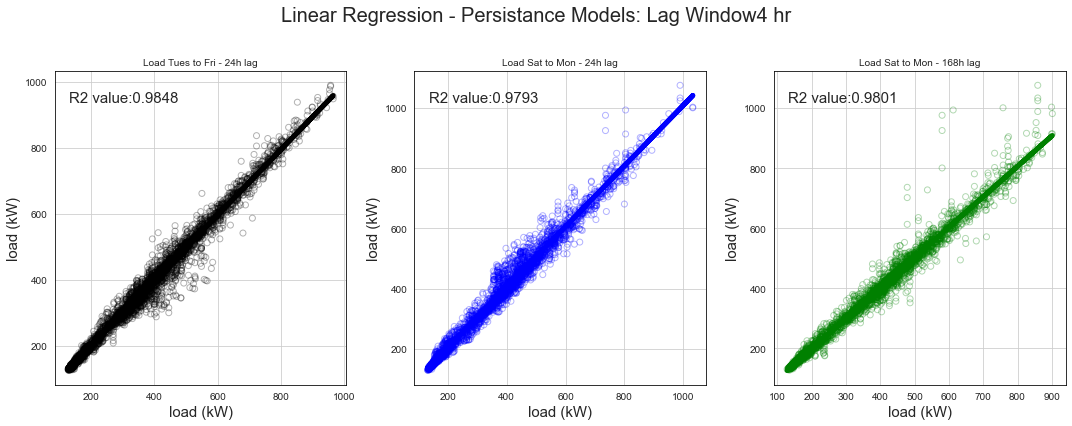

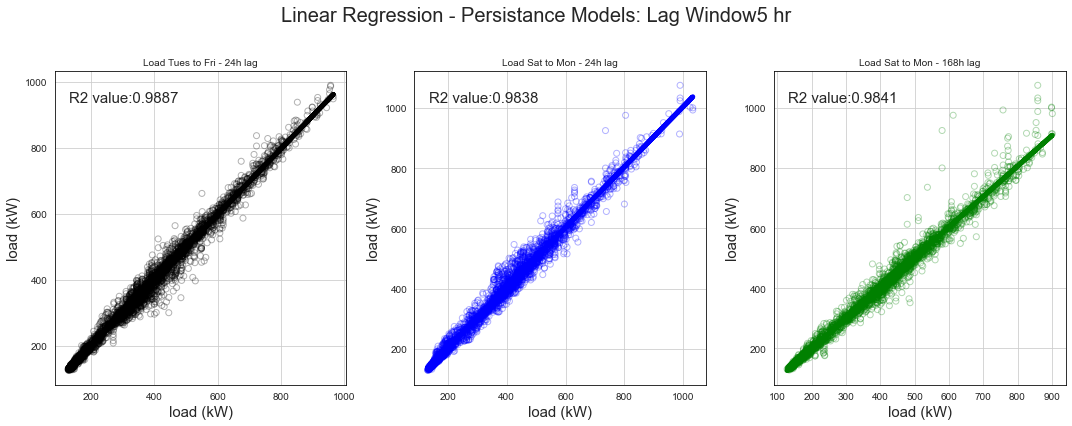

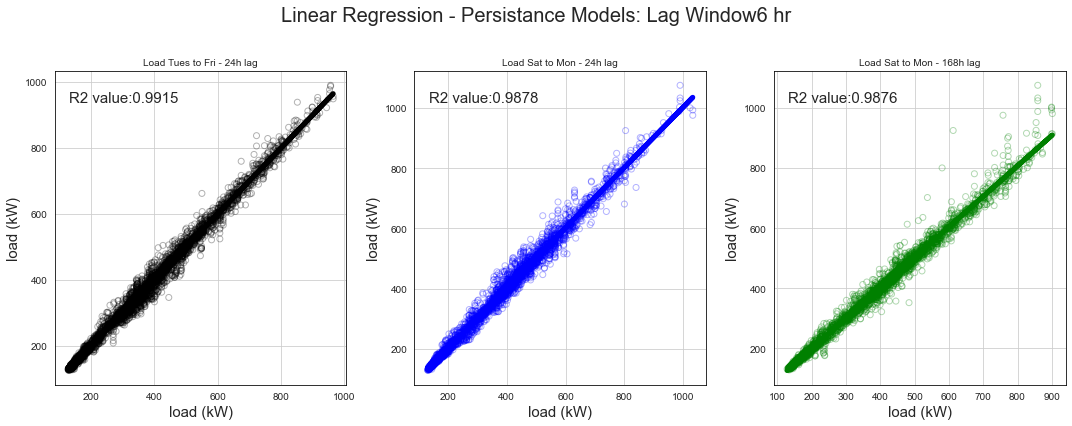

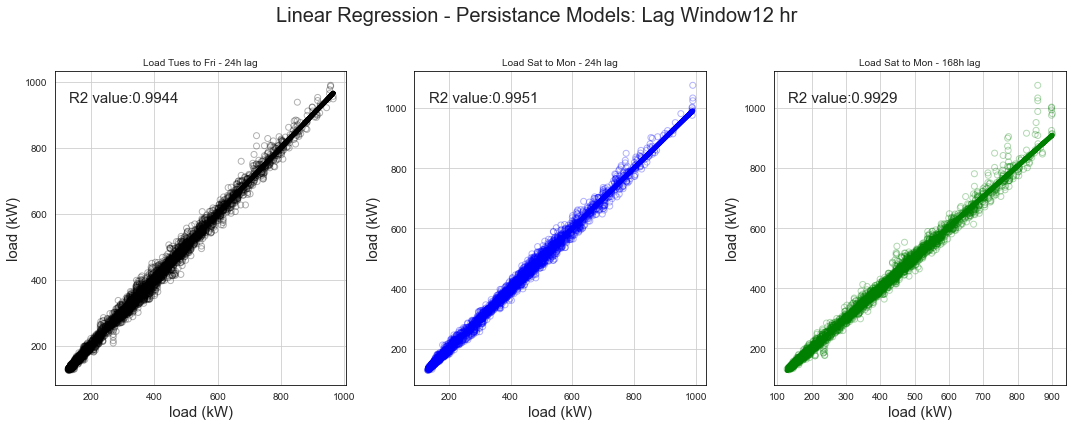

In [ ]:
# first run for Aggregate load case : calculate R2 for a series of window widths ranging from 0 (default) to +/- 12hr

pdLoadSeries=aggLoad
smplsPerDay=24
nDays=365
titles=['Load Tues to Fri - 24h lag','Load Sat to Mon - 24h lag','Load Sat to Mon - 168h lag']
r2_vals=[]
r2_TtoF=[]
r2_StoM=[]
r2_StoM_7d=[]

df_r2_TtoF=pd.DataFrame()
df_r2_StoM=pd.DataFrame()
df_r2_StoM_7d=pd.DataFrame()
DoW_dfs_dict = {'TtoF':df_r2_TtoF,'StoM':df_r2_StoM,'StoM_7d':df_r2_StoM_7d}


for w in [0,1,2,3,4,5,6,12]:
    
    # get load series for each DoW class
    lDataTtoF_W = persistDataWindowed(pdLoadSeries,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
    lDataStoM_W = persistDataWindowed(pdLoadSeries,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
    lDataStoM_7d_W = persistDataWindowed(pdLoadSeries,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
    fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

    # get R2 value for each DoW class
    r2a = r2_get(lDataTtoF_W,plot='y',print='n',cl='k',inputFigObject=fig,subplotPos=1,subplotTitle=titles[0]) 
    r2b = r2_get(lDataStoM_W,plot='y',print='n',cl='b',inputFigObject=fig,subplotPos=2,subplotTitle=titles[1]) 
    r2c = r2_get(lDataStoM_7d_W,plot='y',print='n',cl='g',inputFigObject=fig,subplotPos=3,subplotTitle=titles[2])
    #DoW_r2_dict = ['TtoF':r2_TtoF,'StoM':r2_StoM,'StoM_7d':r2_StoM_7d]
    
    r2_TtoF.append([r2a])
    r2_StoM.append([r2b])
    r2_StoM_7d.append([r2c])
                      
    r2_vals.append([r2a,r2b,r2c])

    fig.suptitle('Linear Regression - Persistance Models: Lag Window' + str(w)+' hr')         

    fig.tight_layout()
    fig.subplots_adjust(top=0.83)
    
fname = './Figures.Ireland/Aggregate Persistance Models - linear regression for suite of window bin widths.png'
fig.savefig(fname, dpi=300, format='png',  bbox_inches='tight')  

#print("r2_TtoF: \n",r2_TtoF)
#print(pd.DataFrame(r2_TtoF))

df_r2_TtoF=pd.concat([df_r2_TtoF,pd.DataFrame(r2_TtoF)],axis=1)
df_r2_StoM=pd.concat([df_r2_StoM,pd.DataFrame(r2_StoM)],axis=1)
df_r2_StoM_7d=pd.concat([df_r2_StoM_7d,pd.DataFrame(r2_StoM_7d)],axis=1)
df_r2_TtoF


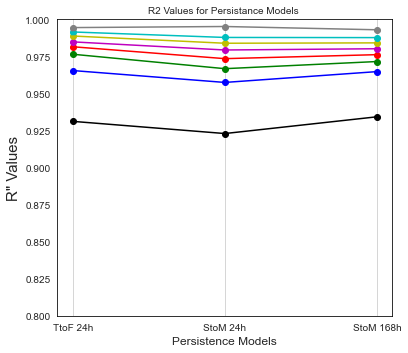

In [ ]:
# Plot R2 vals from aggregate case above

fig = plt.figure(figsize=(6,12))
ax1 = fig.add_subplot(211)

x=np.arange(1,4,1)
cl=['k','b','g','r','m','y','c','grey']

for i in range(len(r2_vals)):
    ax1.plot(x,r2_vals[i],color=cl[i])
    ax1.scatter(x,r2_vals[i],color=cl[i])

ax1.set_xticks(x)
ax1.set_xticklabels(['TtoF 24h', 'StoM 24h', 'StoM 168h'])
ax1.set_xlabel('Persistence Models', fontsize=12)
ax1.set_ylabel('R" Values')
ax1.set_ylim([0.8,1])

ax1.set_title('R2 Values for Persistance Models ')
ax1.grid(axis='y')

In [ ]:
# now run for individual uIDs 

uIDs=hourly_df.index.values
len(uIDs)
uIDs

array([1002, 1014, 1018, 1022, 1027, 1030, 1035, 1036, 1058, 1059, ...,
       7400, 7403, 7414, 7418, 7420, 7428, 7432, 7436, 7437, 7441],
      dtype=int64)

In [ ]:
# firstly: run TEST for small subset of uID, windowHW to plot results and check working , estimate time required etc
uIDs_test=uIDs[0:2]

** Loop thro uIDs and calc r2 for each uID : compute 3 r2 values for each uID: TtoF,StoM (t-24) model and StoM (t-168) model**

1002
Wall time: 685 ms
Wall time: 1.12 s
Wall time: 1.59 s
R2 Values for uID: 1002 for window HW in  [0, 1, 2] are : [1002, [0.0800201967040608, 0.05558040302559686, 0.031861696582752286], [0.3598264429588862, 0.28913849417401516, 0.18546802295482512], [0.4849169433128727, 0.4511229733288632, 0.3029220996217995]]
1014
Wall time: 553 ms
Wall time: 1.21 s
Wall time: 2 s
R2 Values for uID: 1014 for window HW in  [0, 1, 2] are : [1014, [0.17698105458654367, 0.13578398613892273, 0.11271924874705419], [0.5530301492162386, 0.5038732105607339, 0.46609462152138037], [0.6990846011118457, 0.6548493651304036, 0.6451457427313175]]


{'TtoF':        1002      1014
 0  0.080020  0.176981
 1  0.359826  0.553030
 2  0.484917  0.699085,
 'StoM':        1002      1014
 0  0.055580  0.135784
 1  0.289138  0.503873
 2  0.451123  0.654849,
 'StoM_7d':        1002      1014
 0  0.031862  0.112719
 1  0.185468  0.466095
 2  0.302922  0.645146}

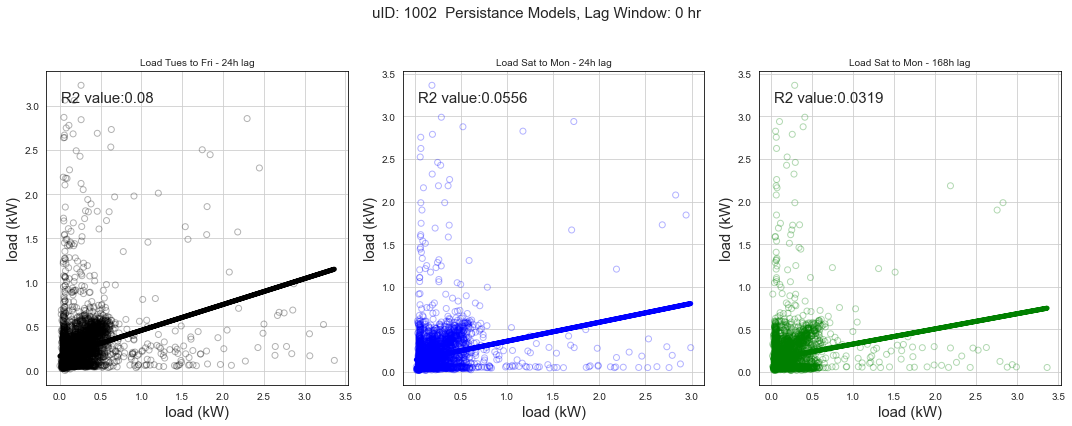

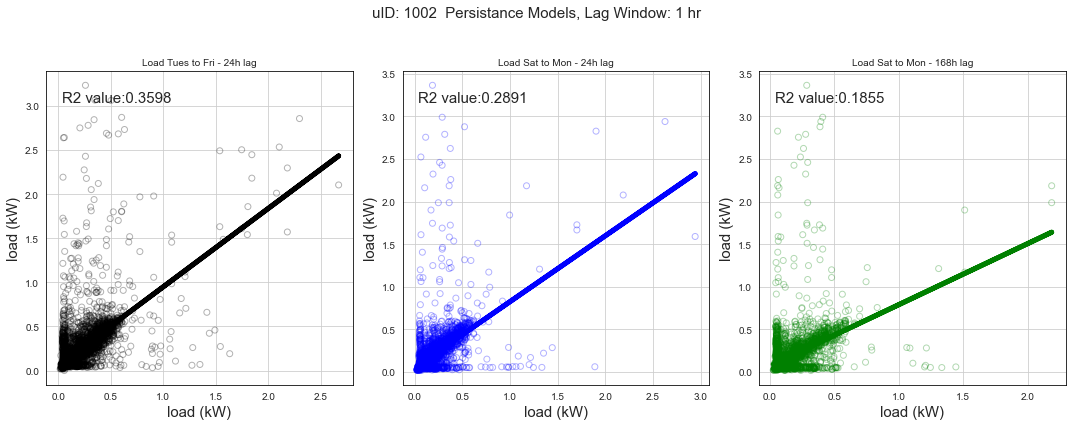

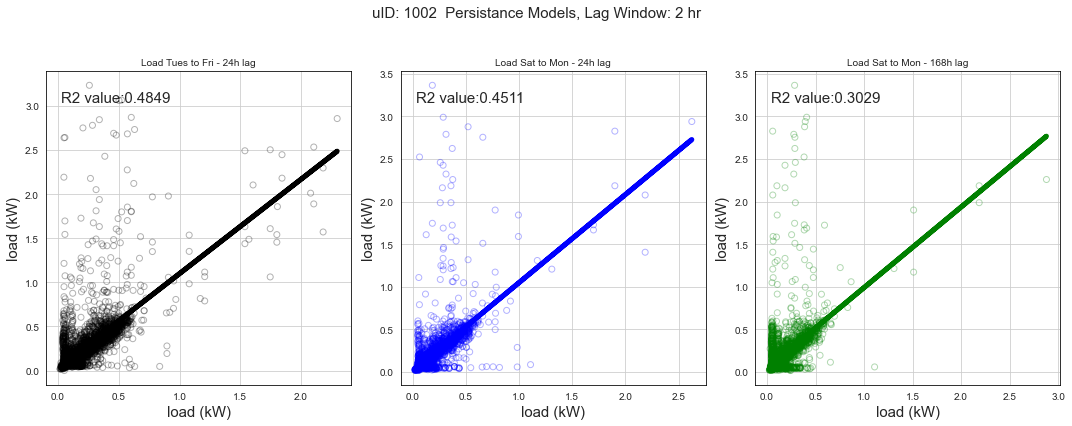

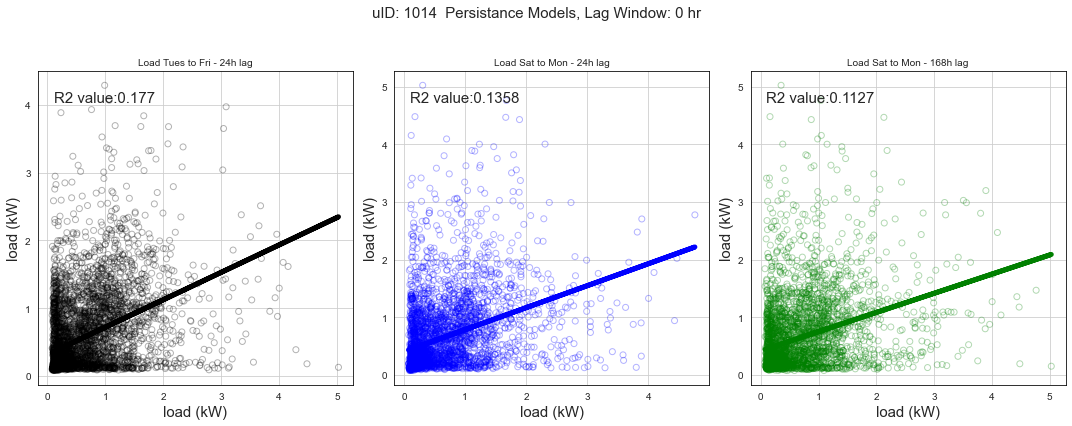

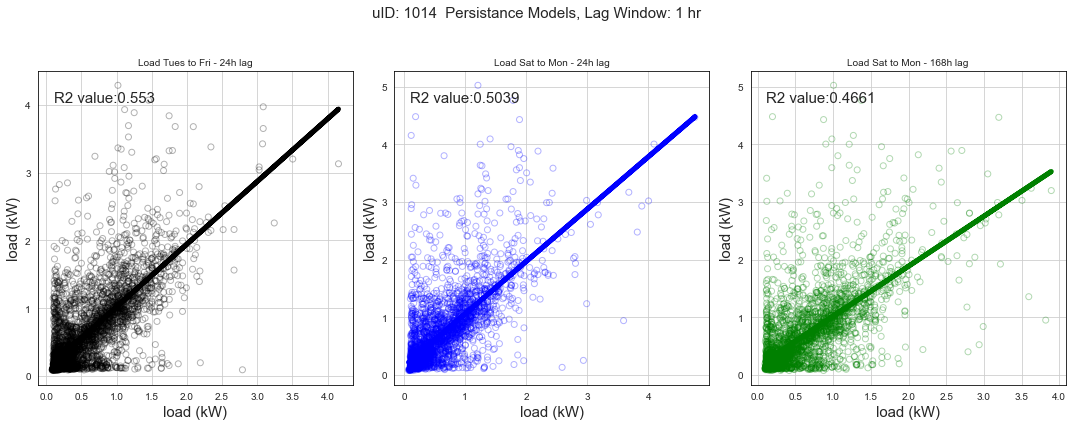

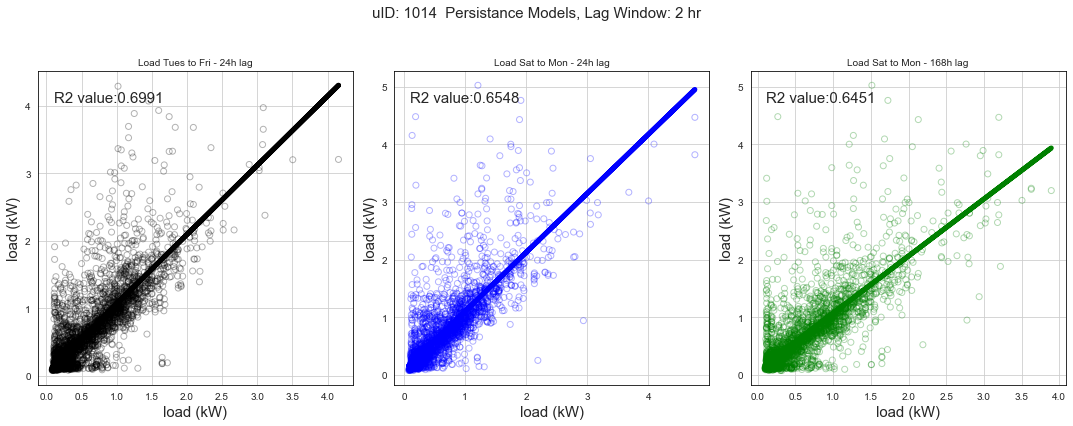

In [ ]:
smplsPerDay=24
nDays=365
titles=['Load Tues to Fri - 24h lag','Load Sat to Mon - 24h lag','Load Sat to Mon - 168h lag']

#windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
windows=[0,1,2]

# set output dataframe column names
colBaseNames=['r2_TtoF_w','r2_StoM_w','r2_StoM7d_w']
colNames=['uID']
DoWclasses=['uID]']  #not a typo!

for w in windows:
    a=str(colBaseNames[0])+str(w)
    b=str(colBaseNames[1])+str(w)
    c=str(colBaseNames[2])+str(w)
    colNames.extend([a,b,c])
    a=str(colBaseNames[0])
    b=str(colBaseNames[1])
    c=str(colBaseNames[2])
    DoWclasses.extend([a,b,c])    
    
#print("column names: ",colNames) 
#print("DoWclasses: ",DoWclasses)

#r2List_uIDs=[]    # list to hold all R2 values

#initialize dataframes to hold uID r2 values
df_r2_TtoF=pd.DataFrame()
df_r2_StoM=pd.DataFrame()
df_r2_StoM_7d=pd.DataFrame()

for uID in uIDs_test:
    uID_load  = hourly_df.loc[uID]      
    print(uID)
    
    #initialize lists to hold r2 for each window value
    r2_TtoF=[]
    r2_StoM=[]
    r2_StoM_7d=[]
    r2_vals=[uID]  # all r2 combined (ie all DoW classes and window sizes)

    # now for uID, loop through window range 
    for w in windows:
        %time lDataTtoF_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
        lDataStoM_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
        lDataStoM_7d_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
        fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

        r2a = r2_get(lDataTtoF_W,plot='y',print='n',cl='k',inputFigObject=fig,subplotPos=1,subplotTitle=titles[0]) 
        r2b = r2_get(lDataStoM_W,plot='y',print='n',cl='b',inputFigObject=fig,subplotPos=2,subplotTitle=titles[1]) 
        r2c = r2_get(lDataStoM_7d_W,plot='y',print='n',cl='g',inputFigObject=fig,subplotPos=3,subplotTitle=titles[2])

        r2_TtoF.append([r2a])
        r2_StoM.append([r2b])
        r2_StoM_7d.append([r2c])
                      
        r2_vals.append([r2a,r2b,r2c])
        #r2_vals.extend([r2_TtoF,r2_StoM,r2_StoM_7d]) # grouping r2 values by 3 dayclasses

        fig.suptitle('uID: '+str(uID)+'  Persistance Models, Lag Window: ' + str(w)+' hr',fontsize=15)         

        fig.tight_layout()
        fig.subplots_adjust(top=0.83)
    
    print("R2 Values for uID:",uID,"for window HW in ",windows,"are :",r2_vals)
    #r2List_uIDs.append(r2_vals)   # iteratvely append list of R2 values for current uID

    df_r2_TtoF=pd.concat([df_r2_TtoF,pd.DataFrame(r2_TtoF,columns=[uID])],axis=1)
    df_r2_StoM=pd.concat([df_r2_StoM,pd.DataFrame(r2_StoM,columns=[uID])],axis=1)
    df_r2_StoM_7d=pd.concat([df_r2_StoM_7d,pd.DataFrame(r2_StoM_7d,columns=[uID])],axis=1)
    
for df in [df_r2_TtoF,df_r2_StoM,df_r2_StoM_7d]:
    df.index = windows


DoW_dfs_dict = {'TtoF':df_r2_TtoF,'StoM':df_r2_StoM,'StoM_7d':df_r2_StoM_7d}
DoW_dfs_dict

** Next bit takes > 6 hrs to run **

In [ ]:
# now run for all uIDs without plotting
smplsPerDay=24
nDays=365

#windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
windows=[0,1,2]

# set output dataframe column names
colBaseNames=['r2_TtoF_w','r2_StoM_w','r2_StoM7d_w']
colNames=['uID']

for w in windows:      # create column names for o/p dataframe
    a=str(colBaseNames[0])+str(w)
    b=str(colBaseNames[1])+str(w)
    c=str(colBaseNames[2])+str(w)
    colNames.extend([a,b,c])
    
r2List_uIDs=[]    # list to hold all R2 values

for uID in uIDs_test:                        # or for Grp in [grp,0,grp1,grp2...] for aggregation level test
    start_time = time.time()
    
    uID_load  = hourly_df.loc[uID]      # selevct load data (eg individual or aggregate of N households)

    
    # now for uID, loop through window range 
    for w in windows:
        lDataTtoF_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
        lDataStoM_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
        lDataStoM_7d_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
        #fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

        r2_TtoF = r2_get(lDataTtoF_W) 
        r2_StoM = r2_get(lDataStoM_W) 
        r2_StoM_7d = r2_get(lDataStoM_7d_W)
        #print(r2_TtoF,type(r2_TtoF))
        
        r2_TtoF.append([r2a])     
        r2_StoM.append([r2b])
        r2_StoM_7d.append([r2c])
                      
        r2_vals.append([r2a,r2b,r2c])

        
        
        
        
        r2_vals.extend([r2_TtoF,r2_StoM,r2_StoM_7d])  # add 3 sets of R2 values to list (row)
        # calculate execution time and print
 
    r2List_uIDs.append(r2_vals)   # iteratvely append list of R2 values for current uID
    print("uID: ",uID,"--- %s seconds ---" % (time.time() - start_time)) 


r2uIDsW_df = pd.DataFrame(r2List_uIDs,columns = colNames)
r2uIDsW_df = r2uIDsW_df.set_index('uID')
r2uIDsW_df


0.0800201967040608 <class 'numpy.float64'>


AttributeError: 'numpy.float64' object has no attribute 'append'

In [ ]:
#r2uIDsW_df.to_csv('../MScProjectCoding/project_data/intermediateDataIreland/r2uIDsW_df.csv')
r2uIDsW_df.to_pickle('../MScProjectCoding/project_data/intermediateDataIreland/CER3_r2uIDsW_df.pkl')

In [ ]:
r2_histogram(r2uIDsW_df,pltTitle='Window Bins +/- 1hr to +/-12 hrs',SaveFigTitle='Persistence Models - R2 multi-window Histogram')

In [ ]:
# set output dataframe column names
colBaseNames=['r2_TtoF_w','r2_StoM_w','r2_StoM7d_w']
colNames=['uID']

windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
DoWclasses=['uID]']

for w in windows:
    a=str(colBaseNames[0])
    b=str(colBaseNames[1])
    c=str(colBaseNames[2])
    DoWclasses.extend([a,b,c])    
DoWclasses

In [ ]:
# get median and mean R2 values for each a) day class b) window width
#print(r2uIDsW_df.mean(axis = 0))
r2Medians = np.asarray(r2uIDsW_df.median(axis = 0)).reshape(-1,3).tolist()
r2Means = np.asarray(r2uIDsW_df.mean(axis = 0)).reshape(-1,3).tolist()

len(r2Means)
r2Means

In [ ]:
# Plot R2 vals means and medians for aggregate case above

#fig = plt.figure(figsize=(18,20))
fig = plt.figure(figsize=(25,15))
#ax1 = fig.add_subplot(111)

windows=[0,1,2,3,4,5,6,12] 
x=np.arange(1,4,1)
cl=['k','b','g','r','m','y','c','grey']
titles=['r2Means','r2Medians']
for i,list in enumerate([r2Means,r2Medians]):
    ax1 = fig.add_subplot(2,1,i+1)
    for j in range(len(r2Means)):
        ax1.plot(list[j],x,color=cl[j],label=windows[j])
        ax1.scatter(list[j],x,color=cl[j])

    ax1.set_yticks(x)
    ax1.set_yticklabels(['TtoF 24h', 'StoM 24h', 'StoM 168h'])
    ax1.set_ylabel('Persistence Models', fontsize=12)
    ax1.set_xlabel('R" Values')
    ax1.set_xlim([0.0,1])
    ax1.legend()

    ax1.set_title('R2 Values for Persistance Models:'+str(titles[i]))
    ax1.grid(axis='x')


In [ ]:
r2_histogram(r2uIDsW_df,pltTitle='Window Bins +/- 1hr to +/-12 hrs',SaveFigTitle='Persistence Models - R2 multi-window Histogram')

In [ ]:
r2_histogramV2(r2uIDsW_df,pltTitle='Window Bins +/- 1hr to +/-12 hrs',\
               SaveFigTitle='Persistence Models R2 multi-window Histogram Greyscale')

# Now run persistDataWindowed on subsets of size N users:
#output: = df of R2 values of dimensions #grps × 24 for each N , takes about 4 hrs to run

In [ ]:
r2Agg = {}  # create empty dictionary to hold set of dataframes with R2 stats for each aggregation level

aggregation_N = [3,6,12,25,50,75,100]   # just short of 7 hrs to run this config
#aggregation_N = [350]  # for testing

smplsPerDay=24
nDays=365

windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
#windows=[0,1,2]   # testing

# set output dataframe column names
colBaseNames=['r2_TtoF','r2_StoM','r2_StoM7d']
colNames=['uID']

#for w in windows:      # create column names for o/p dataframe
#    a=str(colBaseNames[0])
#    b=str(colBaseNames[1])
#    c=str(colBaseNames[2])
#    colNames.extend([a,b,c])
#    for i in range(len(colBaseNames)):
#        windowsCol.append(w)
    
for N in aggregation_N:

    # Run 'out of sample' selection of random user subsets of size N
    df_randIDgrps_N = randomUserGroups(hourly_df,N)

    # loop through randID groups and get aggregate load series for each
    df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)
    
    #initialize dataframes to hold uID r2 values for N
    df_r2_TtoF=pd.DataFrame()
    df_r2_StoM=pd.DataFrame()
    df_r2_StoM_7d=pd.DataFrame()
    
    #Loop through each aggregate group of size N
    for i,uID in  enumerate(df_grpAggLoad_N.columns):     #col in [grp,0,grp1,grp2...etc] for each N
        start_time = time.time()

        #uID_load  = hourly_df.loc[uID]   
        uID_load = df_grpAggLoad_N[uID]      # select load data (eg individual or aggregate of N households)

        #initialize lists to hold r2 for each window value
        r2_TtoF=[]
        r2_StoM=[]
        r2_StoM_7d=[]

        # now for grp/uID, loop through window range 
        for w in windows:
            lDataTtoF_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
            lDataStoM_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
            lDataStoM_7d_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
            #fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

            r2a = r2_get(lDataTtoF_W) 
            r2b = r2_get(lDataStoM_W) 
            r2c = r2_get(lDataStoM_7d_W)
            
            r2_TtoF.append([r2a])
            r2_StoM.append([r2b])
            r2_StoM_7d.append([r2c])
            
        print("For aggregation level N:",N,"Grp/uID: ",uID,"-- %s seconds --" % (time.time() - start_time),"time --%s--" % time.asctime()) 

        df_r2_TtoF=pd.concat([df_r2_TtoF,pd.DataFrame(r2_TtoF,columns=[uID])],axis=1)
        df_r2_StoM=pd.concat([df_r2_StoM,pd.DataFrame(r2_StoM,columns=[uID])],axis=1)
        df_r2_StoM_7d=pd.concat([df_r2_StoM_7d,pd.DataFrame(r2_StoM_7d,columns=[uID])],axis=1)
    
    for df in [df_r2_TtoF,df_r2_StoM,df_r2_StoM_7d]:
        df.index = windows
              
    d={}
    d['TtoF'] = df_r2_TtoF
    d['StoM'] =  df_r2_StoM
    d['StoM_7d'] = df_r2_StoM_7d
         
    r2Agg['%d' % (N)] = d

In [ ]:
#save to pickle !
with open('../MScProjectCoding/project_data/intermediateDataIreland/r2Agg_IRL.pickle', 'wb') as f:
    pickle.dump(r2Agg, f, protocol=pickle.HIGHEST_PROTOCOL)
r2Agg

In [ ]:
# read pickled dictionary
with open('../MScProjectCoding/project_data/intermediateDataIreland/r2Agg_IRL.pickle', 'rb') as pickleFile:
    r2Agg = pickle.load(pickleFile, encoding='latin-1') 
    
r2Agg

In [ ]:
# flip r2Agg dictionary nest levels for dataframe, plotting, etc

from collections import defaultdict
import pprint

r2Agg_flipped = defaultdict(dict)

for key, val in r2Agg.items():
    #print("key: ",key,"val type: ",type(val))
    for subkey, subval in val.items():
        #print("subkey: ",subkey,"subval type: ",type(subval),"\n subval: \n",subval)
        r2Agg_flipped[subkey][key] = subval
        
dict(r2Agg_flipped)['TtoF']

In [ ]:
# create multilevel column names
colIdxLev1 = [['TtoF']*len(aggregation_N),['StoM']*len(aggregation_N),['StoM_7d']*len(aggregation_N)]
colIdxLev1 = [item for sublist in colIdxLev1 for item in sublist]
colIdxLev2 = [n for n in aggregation_N]*3
column_index = [colIdxLev1,colIdxLev2]
column_index

In [ ]:
# create dataframe of R2 vals for all aggregation levels and DoW classes

# currently calculating MEAN , could also compute MEDIAN of R2 values

r2Agg_Avgs_df = pd.DataFrame()

for k,v in dict(r2Agg_flipped).items():
    #print("key:",k)
    for subk,subv in v.items():
        #print(subk,subv.mean(axis=1))
        r2Agg_Avgs_df = pd.concat([r2Agg_Avgs_df,pd.DataFrame(subv.mean(axis=1))],axis=1)

r2Agg_Avgs_df.columns=column_index
r2Agg_Avgs_df


In [ ]:
fig= plt.figure(figsize=(18,6))

for i,DoWclass in enumerate(['TtoF','StoM','StoM_7d']):
    ax1 = fig.add_subplot(1,3,i+1)
    #print(i,DoWclass)
    #plt.subplot(1,3,i+1)
    ax1 = sns.heatmap(r2Agg_Avgs_df[DoWclass], cmap="coolwarm_r",annot=True,fmt=".2f",linewidths=.5, robust=True)
    ax1.set_title('Day Class: '+str(DoWclass), fontsize=18)
    ax1.set_xlabel('Number of users', fontsize=16)
    ax1.set_ylabel('Window half width (hrs)', fontsize=16)
    #ax1.set_xscale('log') # doesn't work
    
# Add a title to the Figure
fig.suptitle('R2 measure for each Day Class as function of household aggregation level\
N and window search half width w hrs', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.83)

fname = './Figures.Ireland/'+'IRL_R2_heatmap.png'
fig.savefig(fname, dpi=300, format='png',  bbox_inches='tight')
